<p align="center">
  <img src="https://github.com/Nnamdi-sys/finalytics/raw/main/logo-color.png" alt="Finalytics Logo">
</p>

# BITCOIN ETF TRACKER

In [1]:
%%capture
!pip install finalytics

In [2]:
from datetime import datetime, date, timedelta
from finalytics import Ticker, Portfolio
from IPython.display import Image, display

### SYMBOLS SEARCH

In [3]:
# List of bitcoin etfs approved by the SEC 
# https://investorplace.com/2024/01/11-spot-bitcoin-etfs-received-sec-approval-heres-the-complete-list/

etf_list = ["ARKB", "BITB", "IBIT", "EZBC", "FBTC", "GBTC", "DEFI", "BTCO", "HODL", "BRRR", "BTCW"]

tickers = []

for symbol in etf_list:
    ticker = Ticker(symbol)
    tickers.append(ticker)
    print({
        "symbol": ticker.symbol, 
        "name": ticker.name,
        "category": ticker.category,
        "asset_class": ticker.asset_class,
        "exchange": ticker.exchange
          })

{'symbol': 'ARKB', 'name': 'ARK 21Shares Bitcoin ETF ARK 21', 'category': 'N/A', 'asset_class': 'ETF', 'exchange': 'BTS'}
{'symbol': 'BITB', 'name': 'Bitwise Bitcoin ETF Common Shar', 'category': 'N/A', 'asset_class': 'Stocks', 'exchange': 'NYQ'}
{'symbol': 'IBIT', 'name': 'Defiance Daily Short Digitizing', 'category': 'N/A', 'asset_class': 'Stocks', 'exchange': 'NGM'}
{'symbol': 'EZBC', 'name': 'Franklin Bitcoin ETF Franklin B', 'category': 'N/A', 'asset_class': 'ETF', 'exchange': 'BTS'}
{'symbol': 'FBTC', 'name': 'Fidelity Wise Origin Bitcoin Fu', 'category': 'N/A', 'asset_class': 'ETF', 'exchange': 'BTS'}
{'symbol': 'GBTC', 'name': 'GRAYSCALE BITCOIN TRUST BTC', 'category': 'N/A', 'asset_class': 'Stocks', 'exchange': 'PNK'}
{'symbol': 'DEFI', 'name': 'Teucrium Corn Fund Hashdex Bitc', 'category': 'N/A', 'asset_class': 'ETF', 'exchange': 'PCX'}
{'symbol': 'BTCO', 'name': 'Invesco Galaxy Bitcoin ETF Inve', 'category': 'N/A', 'asset_class': 'ETF', 'exchange': 'BTS'}
{'symbol': 'HODL', 

### PARAMS

In [4]:
start_date = "2024-01-10" # When the US SEC approved the Bitcoin ETFs
end_date = date.today().strftime("%Y-%m-%d") #current date
interval = "30m" # 30 Minute Intervals. Other possible intervals are (2m, 5m, 15m, 30m, 1h, 1d, 1wk, 1mo, 3mo)
benchmark_symbol = "BTC-USD"  # Using Bictoin as Benchmark for alpha and beta computation
confidence_level=0.95 # threshold for VAR and CVAR computation
risk_free_rate=0.04 # Risk free rate for computing risk adjusted returns 
display_format="png" # display format for charts. other options are (html, notebook)

### SUMMARY STATS

In [5]:
for ticker in tickers:
    print(ticker.get_summary_stats())
    print("\n\n")

{'Symbol': 'ARKB', 'Name': 'ARK 21Shares Bitcoin ETF', 'Exchange': 'Cboe US', 'Currency': 'USD', 'Timestamp': 1705093200, 'Current Price': 43.86, '24H Change': -6.2018776, '24H Volume': 3454789.0, '24H Open': 46.59, '24H High': 46.62, '24H Low': 43.5, '24H Close': 46.76, '52 Week High': 52.22, '52 Week Low': 43.5, '52 Week Change': -6.2018814, '50 Day Average': 45.31, '200 Day Average': 45.31, 'Trailing EPS': 0.0, 'Current EPS': 0.0, 'Forward EPS': 0.0, 'Trailing P/E': 0.0, 'Current P/E': 0.0, 'Forward P/E': 0.0, 'Dividend Rate': 0.0, 'Dividend Yield': 0.0, 'Book Value': 0.0, 'Price to Book': 0.0, 'Market Cap': 0.0, 'Shares Outstanding': 0.0, 'Average Analyst Rating': ''}



{'Symbol': 'BITB', 'Name': '', 'Exchange': 'NYSEArca', 'Currency': 'USD', 'Timestamp': 1705093197, 'Current Price': 23.96, '24H Change': -6.18638, '24H Volume': 3270022.0, '24H Open': 25.53, '24H High': 25.53, '24H Low': 23.82, '24H Close': 25.54, '52 Week High': 28.5, '52 Week Low': 23.82, '52 Week Change': -6.186

### PRICE HISTORY

In [6]:
for ticker in tickers:
    print("{} - {}".format(ticker.symbol, ticker.name))
    print(ticker.get_price_history(start_date, end_date, interval))

ARKB - ARK 21Shares Bitcoin ETF ARK 21
shape: (27, 7)
┌─────────────────────┬───────────┬───────────┬───────────┬───────────┬────────────┬───────────┐
│ timestamp           ┆ open      ┆ high      ┆ low       ┆ close     ┆ volume     ┆ adjclose  │
│ ---                 ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---        ┆ ---       │
│ datetime[ms]        ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64        ┆ f64       │
╞═════════════════════╪═══════════╪═══════════╪═══════════╪═══════════╪════════════╪═══════════╡
│ 2024-01-11 14:30:00 ┆ 50.0      ┆ 52.220001 ┆ 48.25     ┆ 50.7901   ┆ 1.556699e6 ┆ 50.7901   │
│ 2024-01-11 15:00:00 ┆ 50.82     ┆ 50.990002 ┆ 48.760101 ┆ 49.0      ┆ 917671.0   ┆ 49.0      │
│ 2024-01-11 15:30:00 ┆ 49.0      ┆ 49.040001 ┆ 47.369999 ┆ 47.4501   ┆ 384216.0   ┆ 47.4501   │
│ 2024-01-11 16:00:00 ┆ 47.462101 ┆ 47.8386   ┆ 46.66     ┆ 46.813    ┆ 485701.0   ┆ 46.813    │
│ …                   ┆ …         ┆ …         ┆ …         ┆ …         ┆ …

### PRICE CHARTS

Chart Saved to candlestick_chart.png


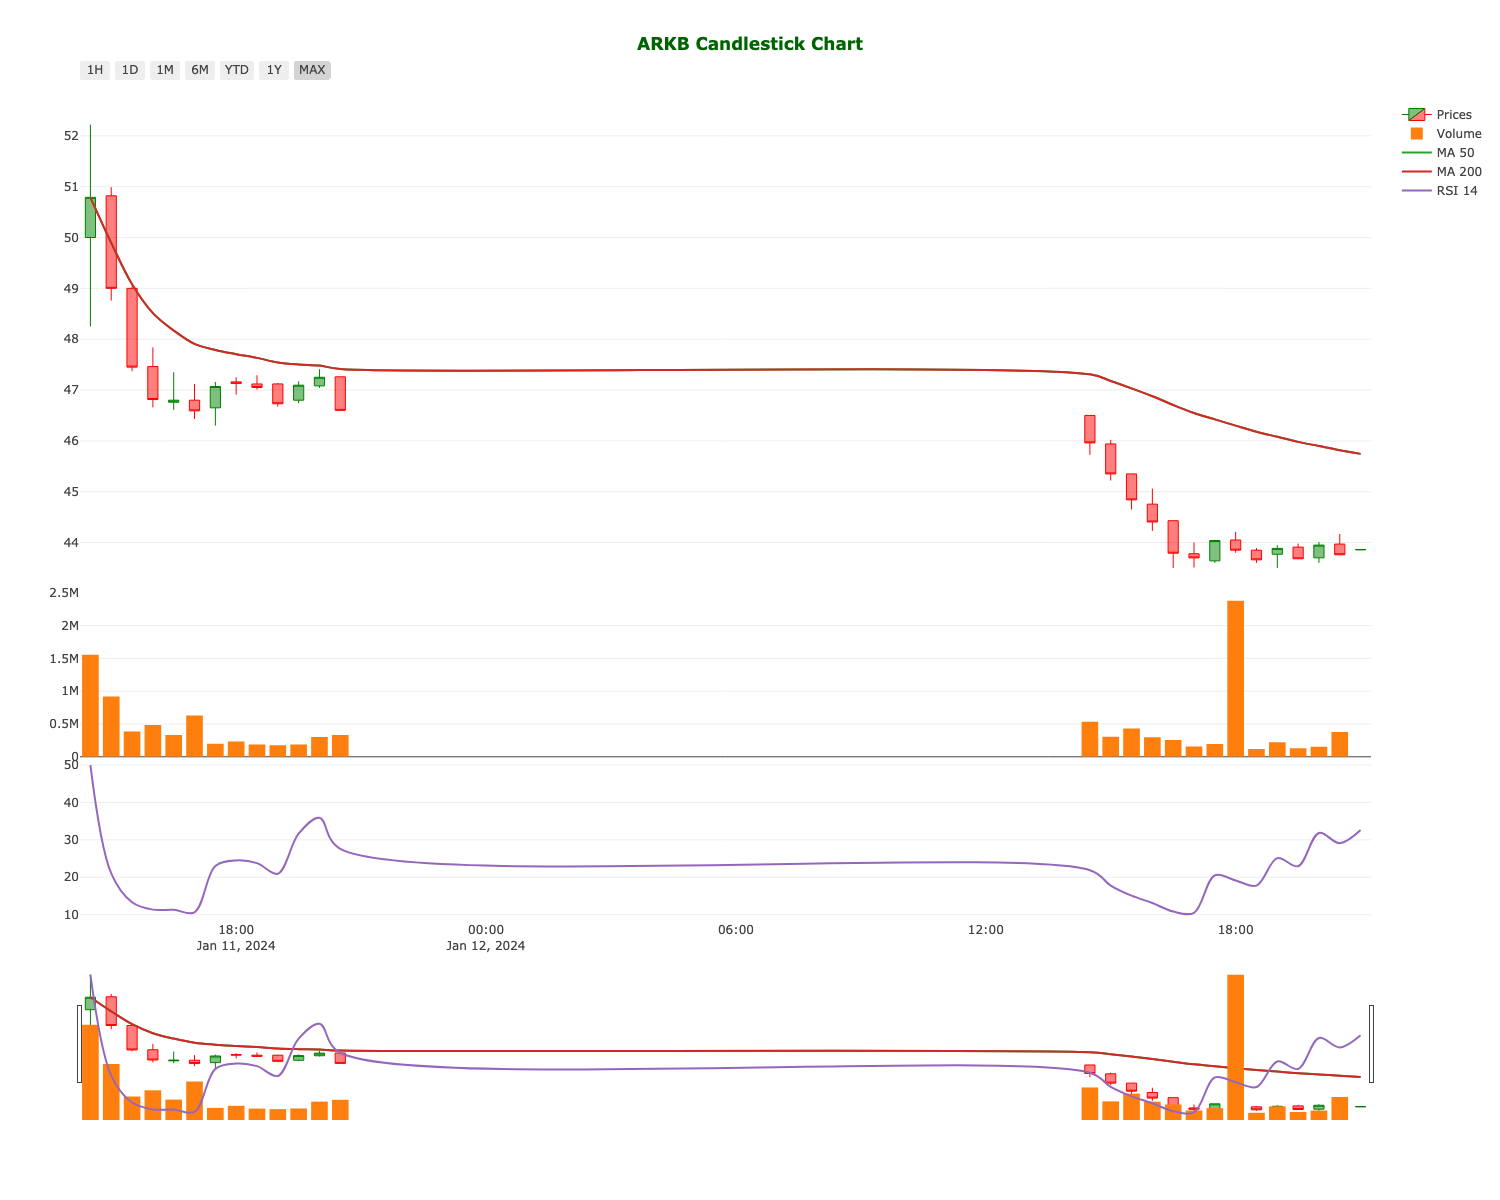

Chart Saved to candlestick_chart.png


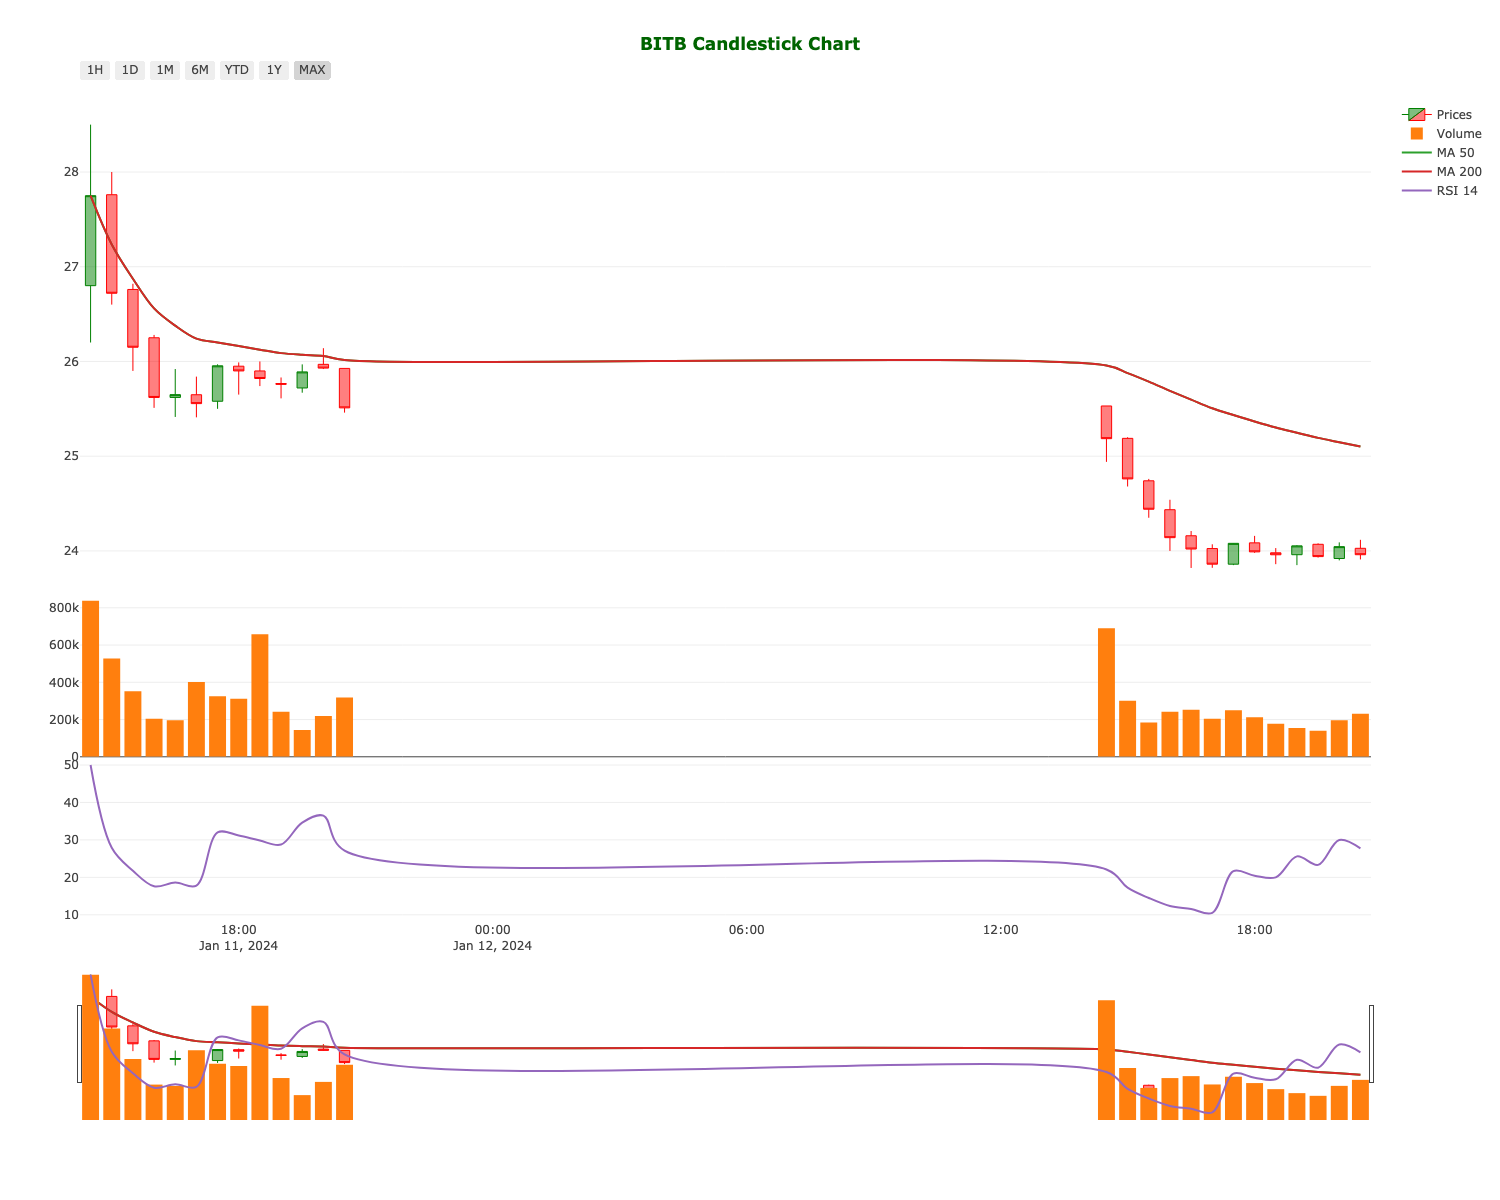

Chart Saved to candlestick_chart.png


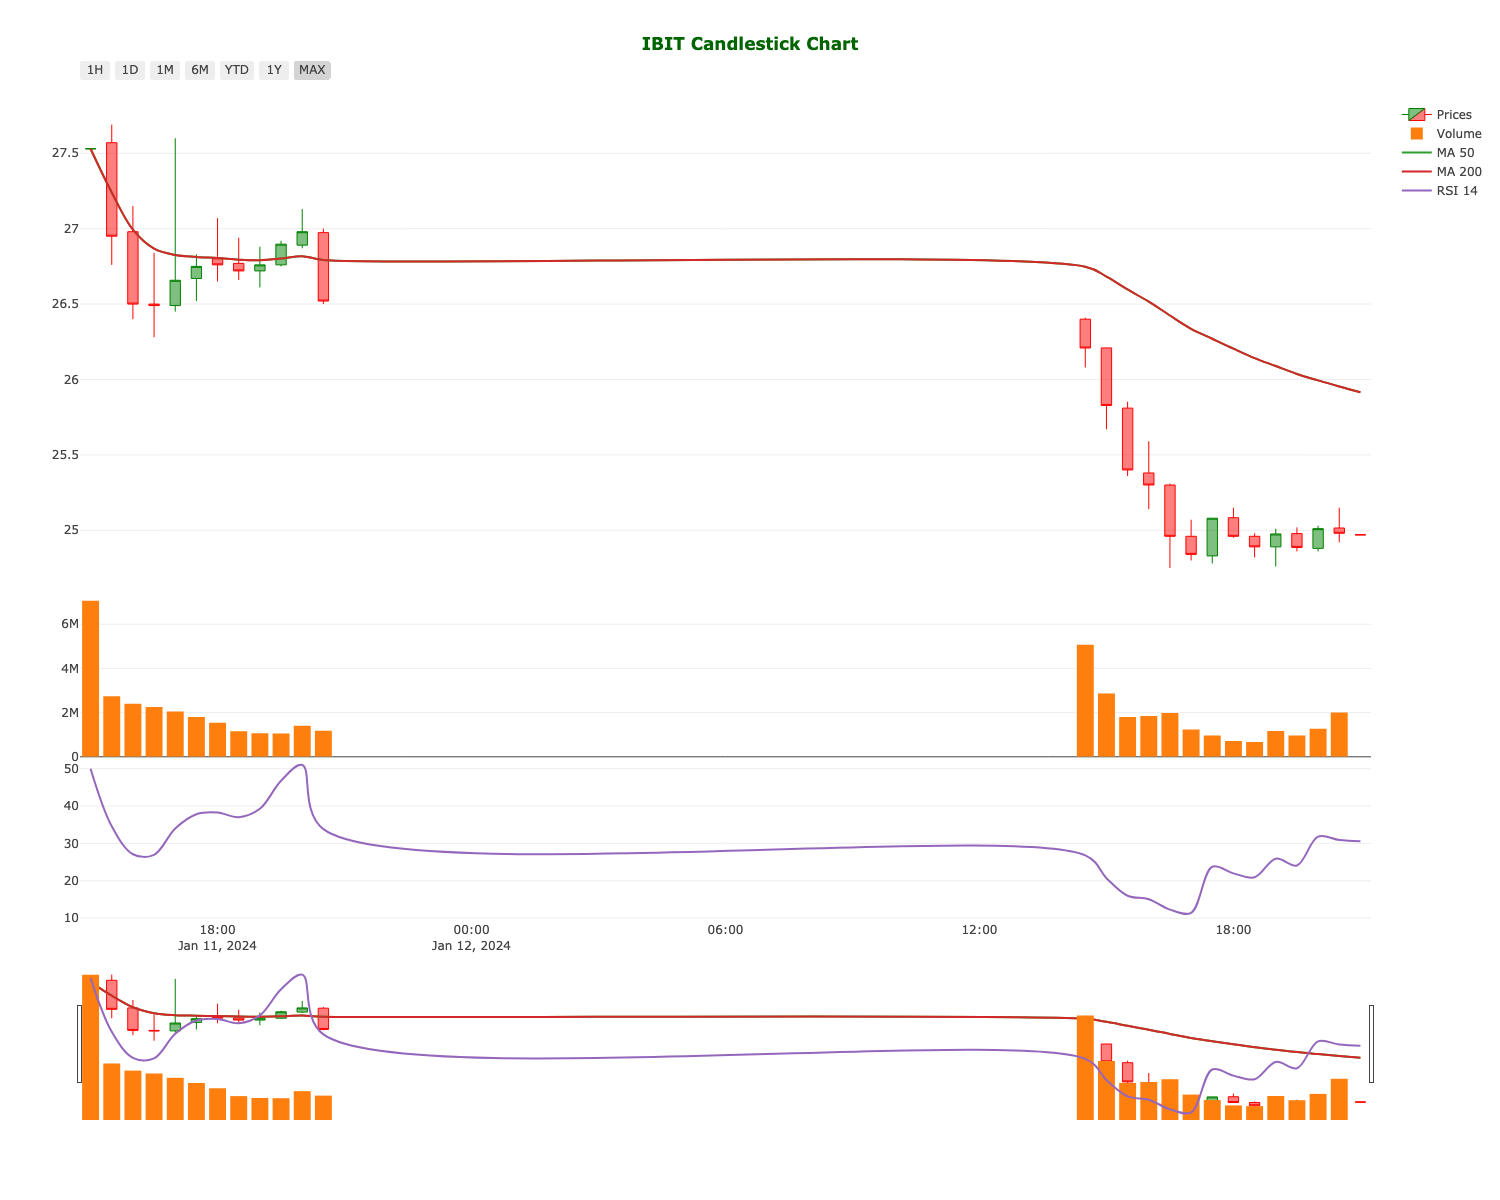

Chart Saved to candlestick_chart.png


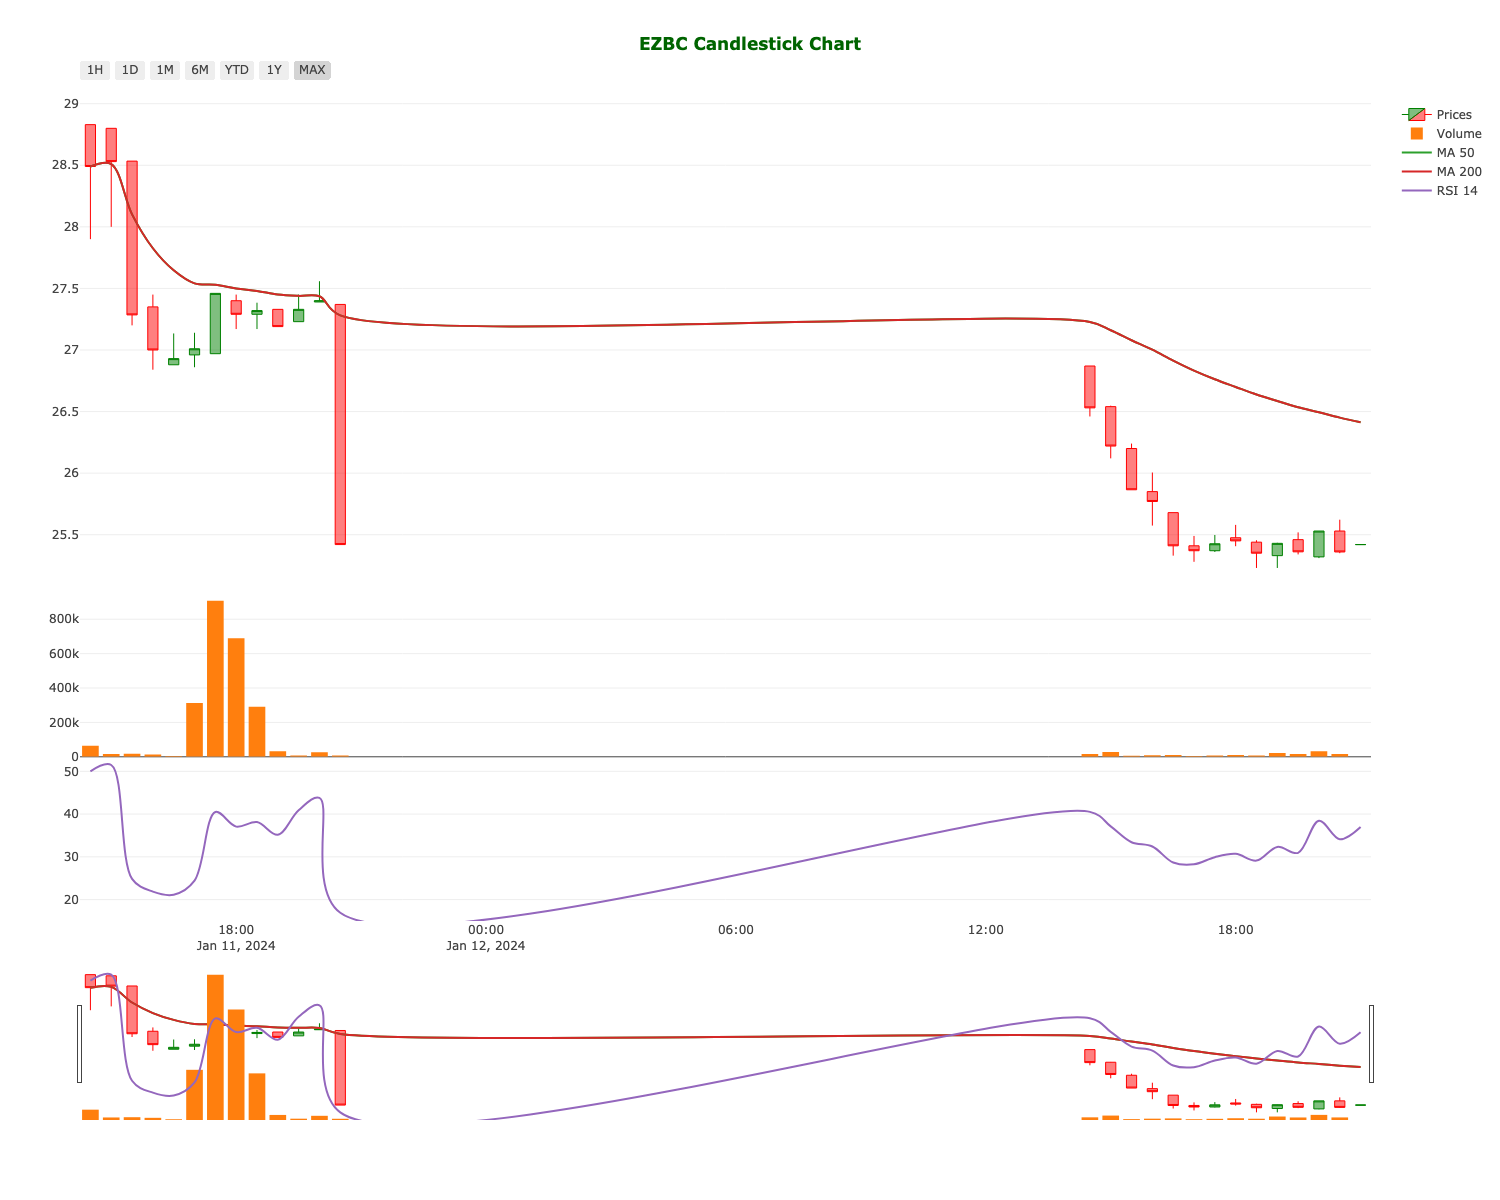

Chart Saved to candlestick_chart.png


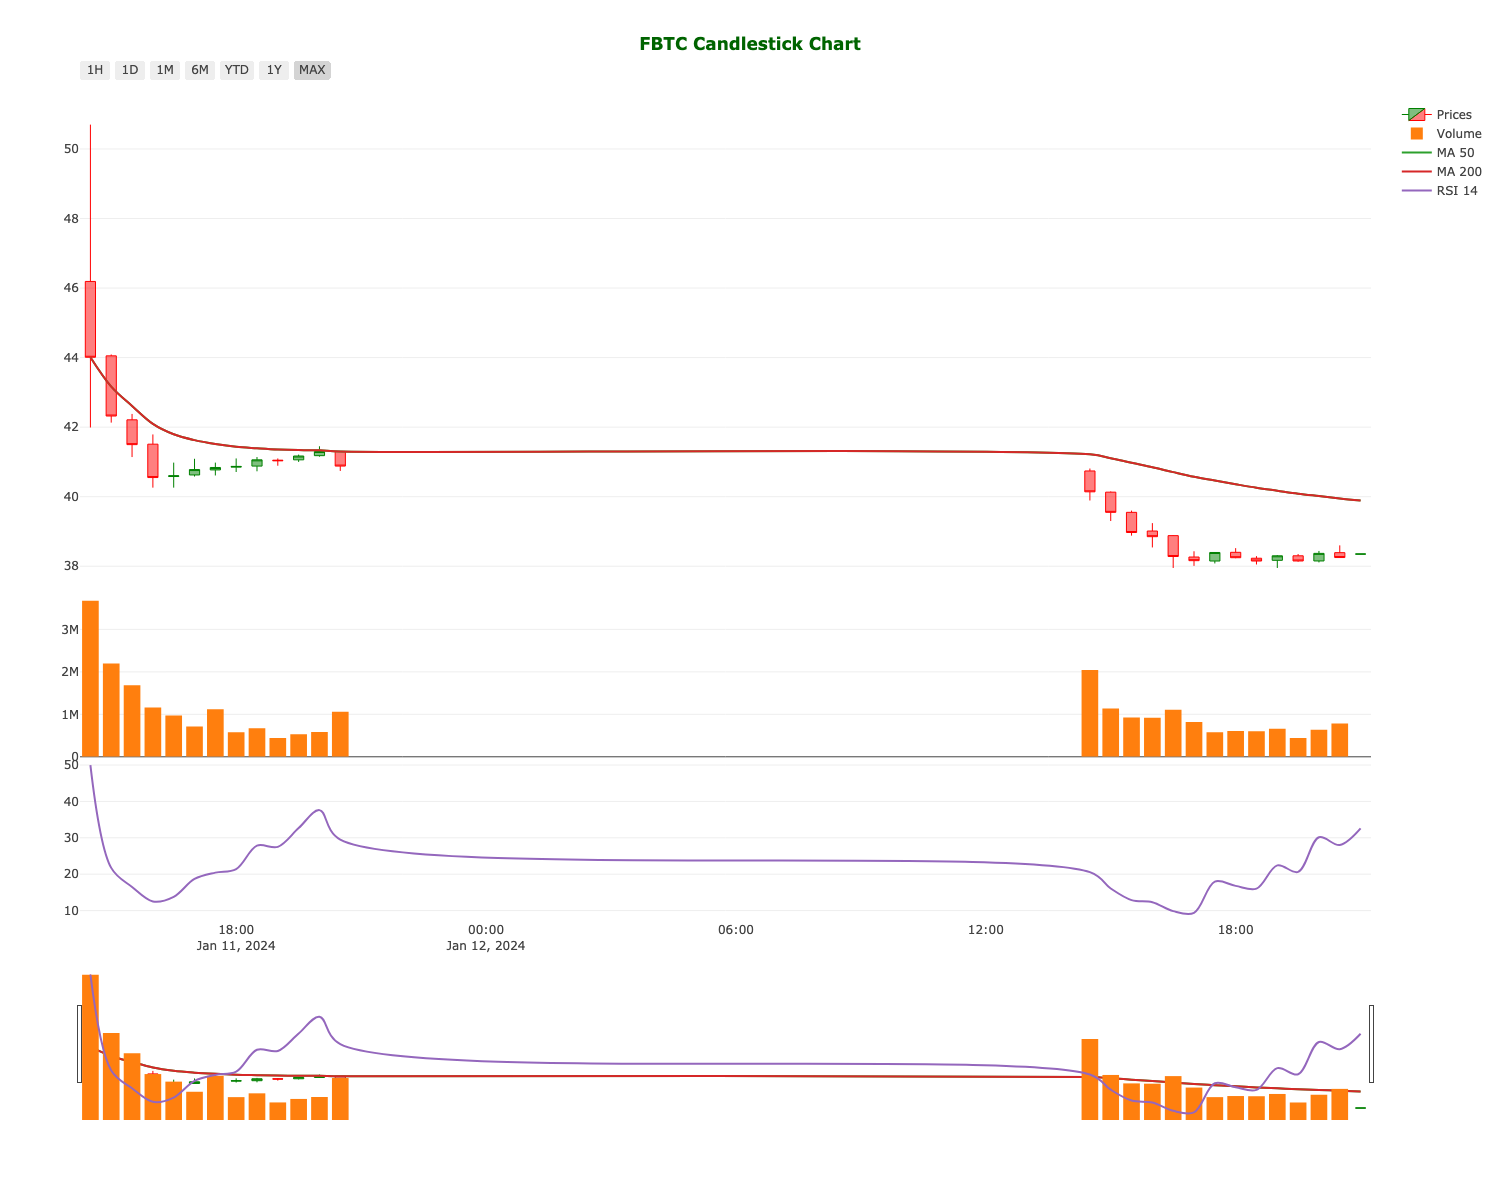

Chart Saved to candlestick_chart.png


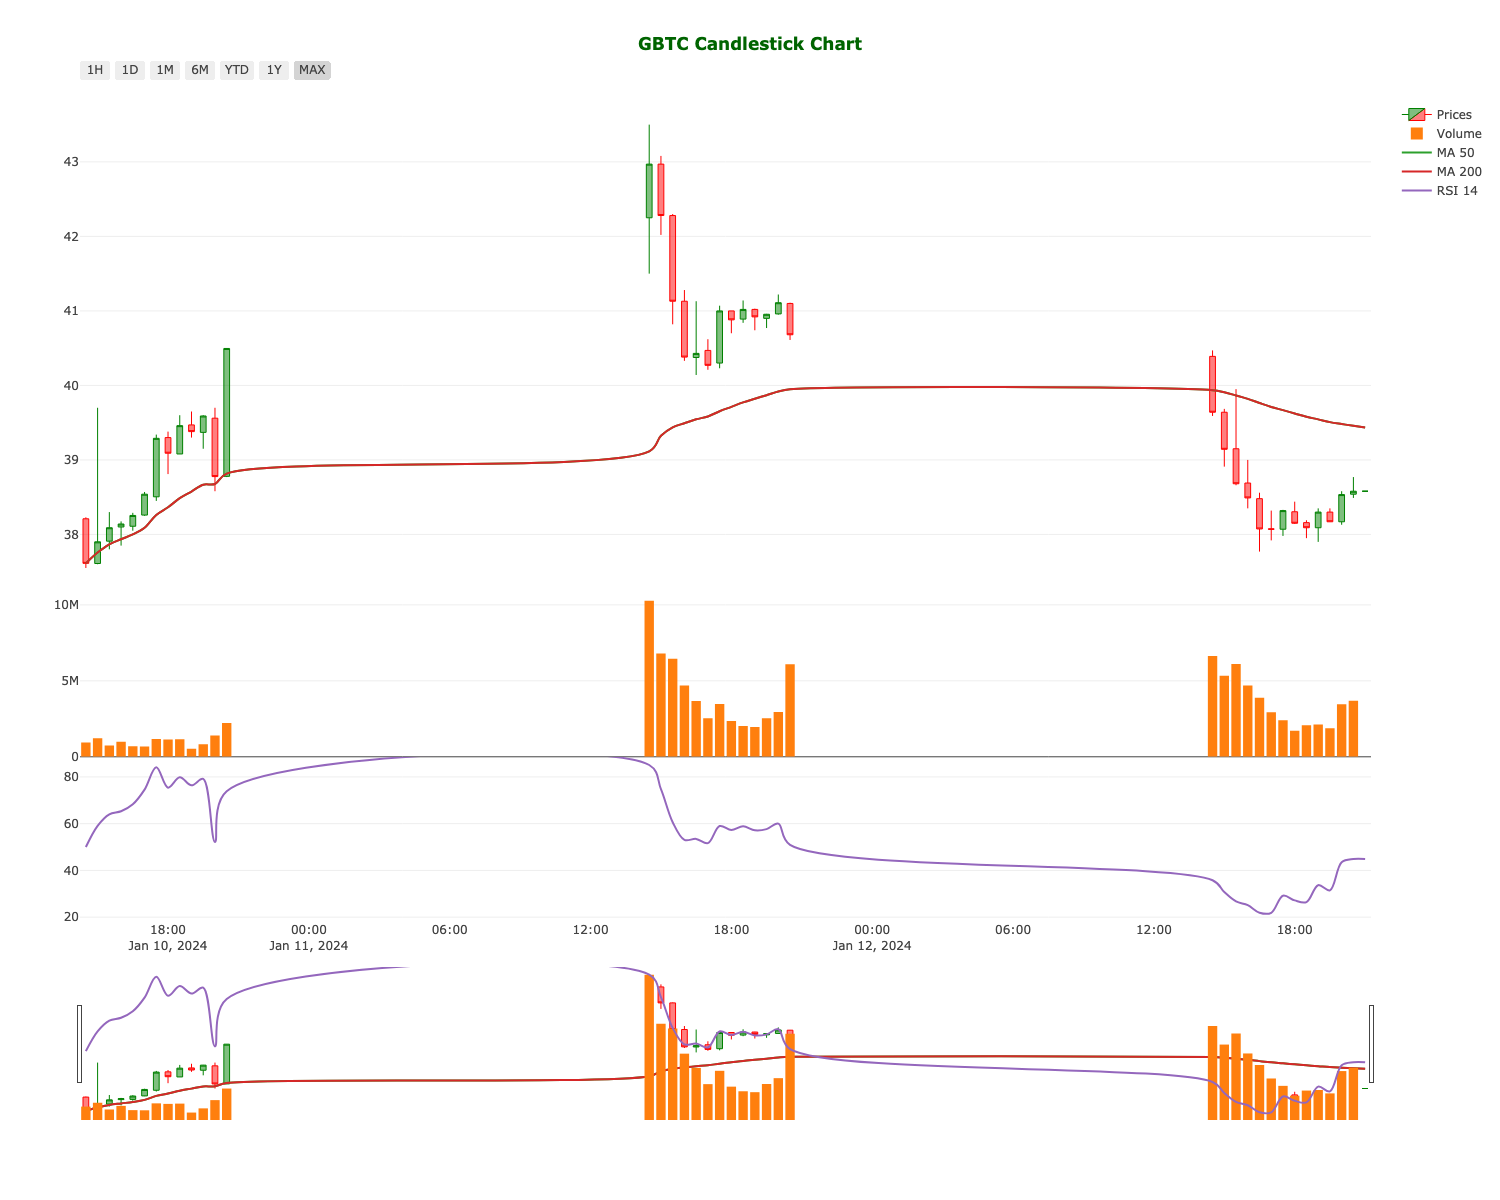

Chart Saved to candlestick_chart.png


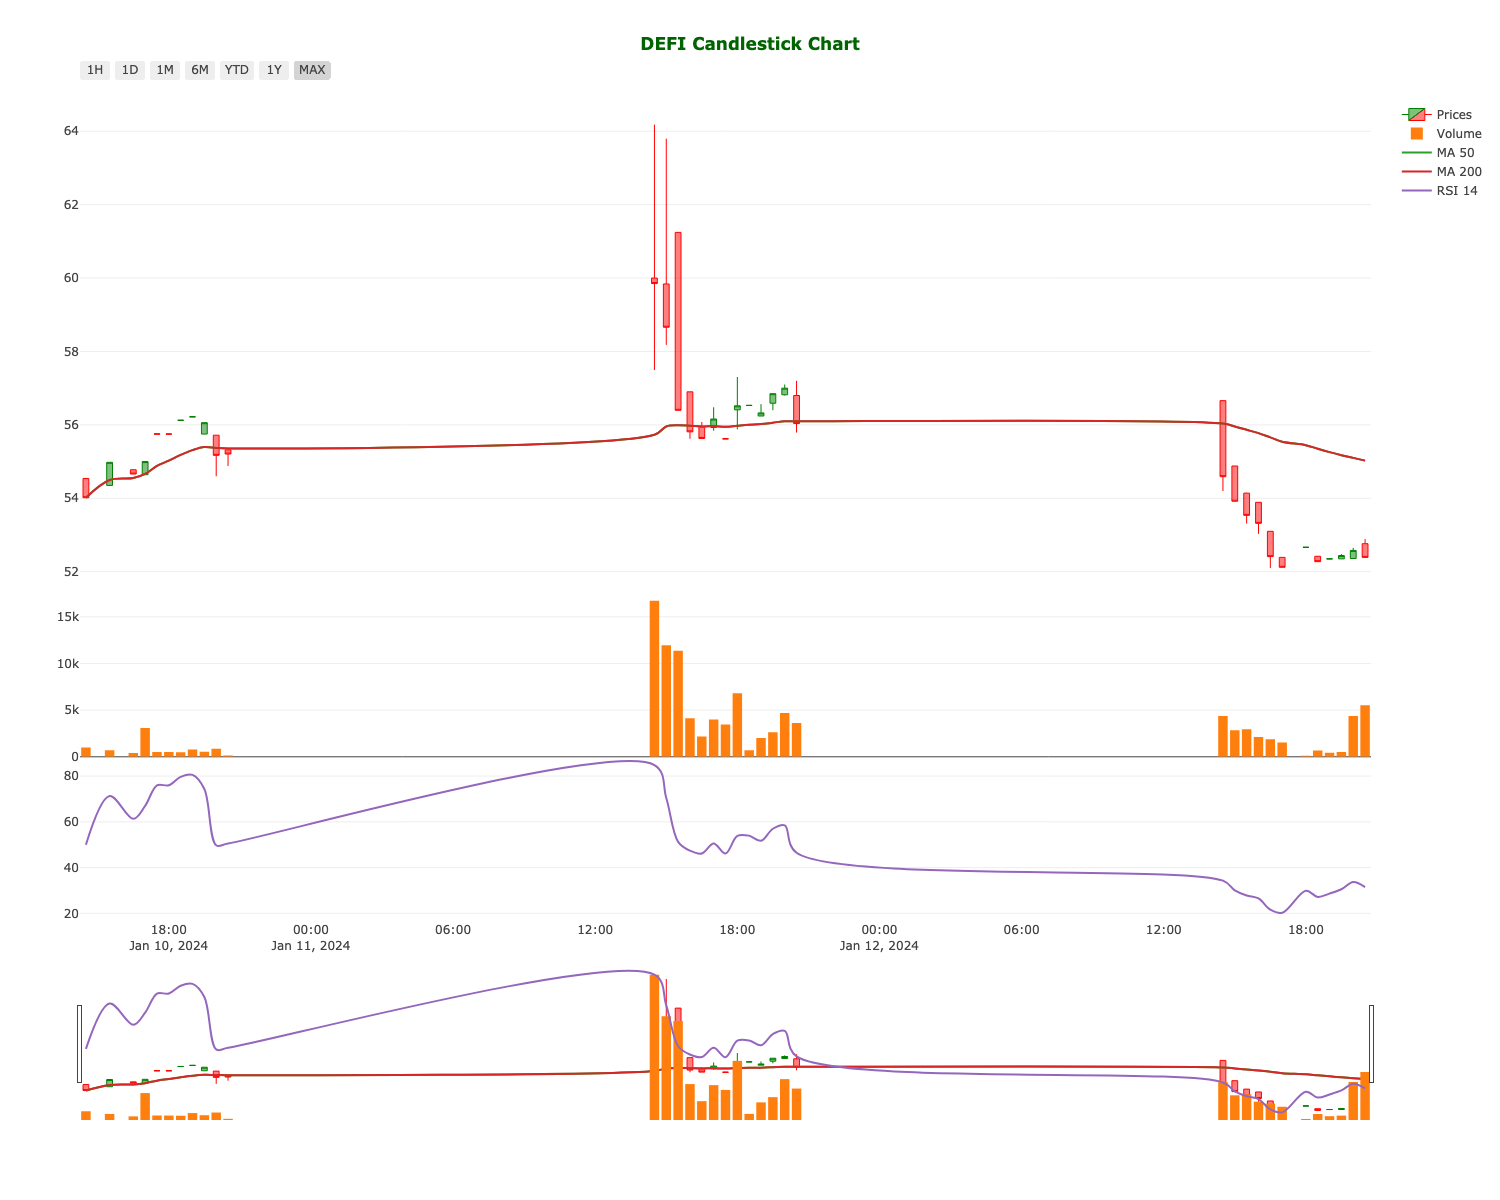

Chart Saved to candlestick_chart.png


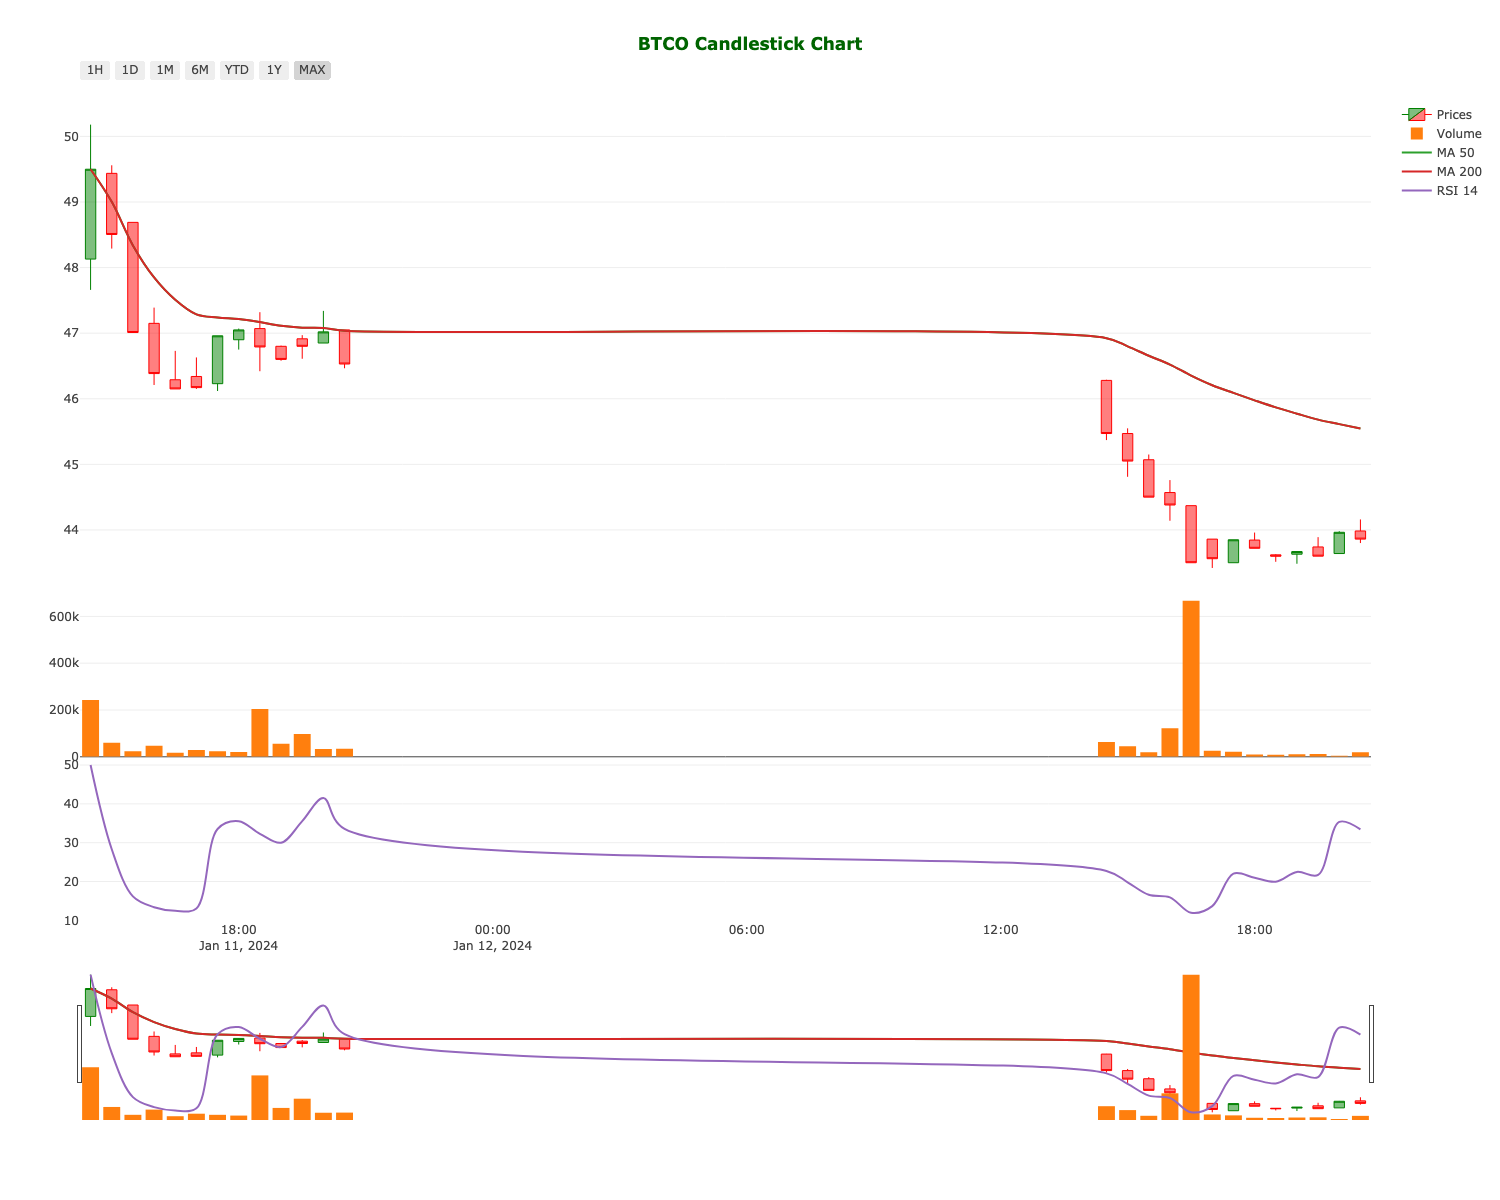

Chart Saved to candlestick_chart.png


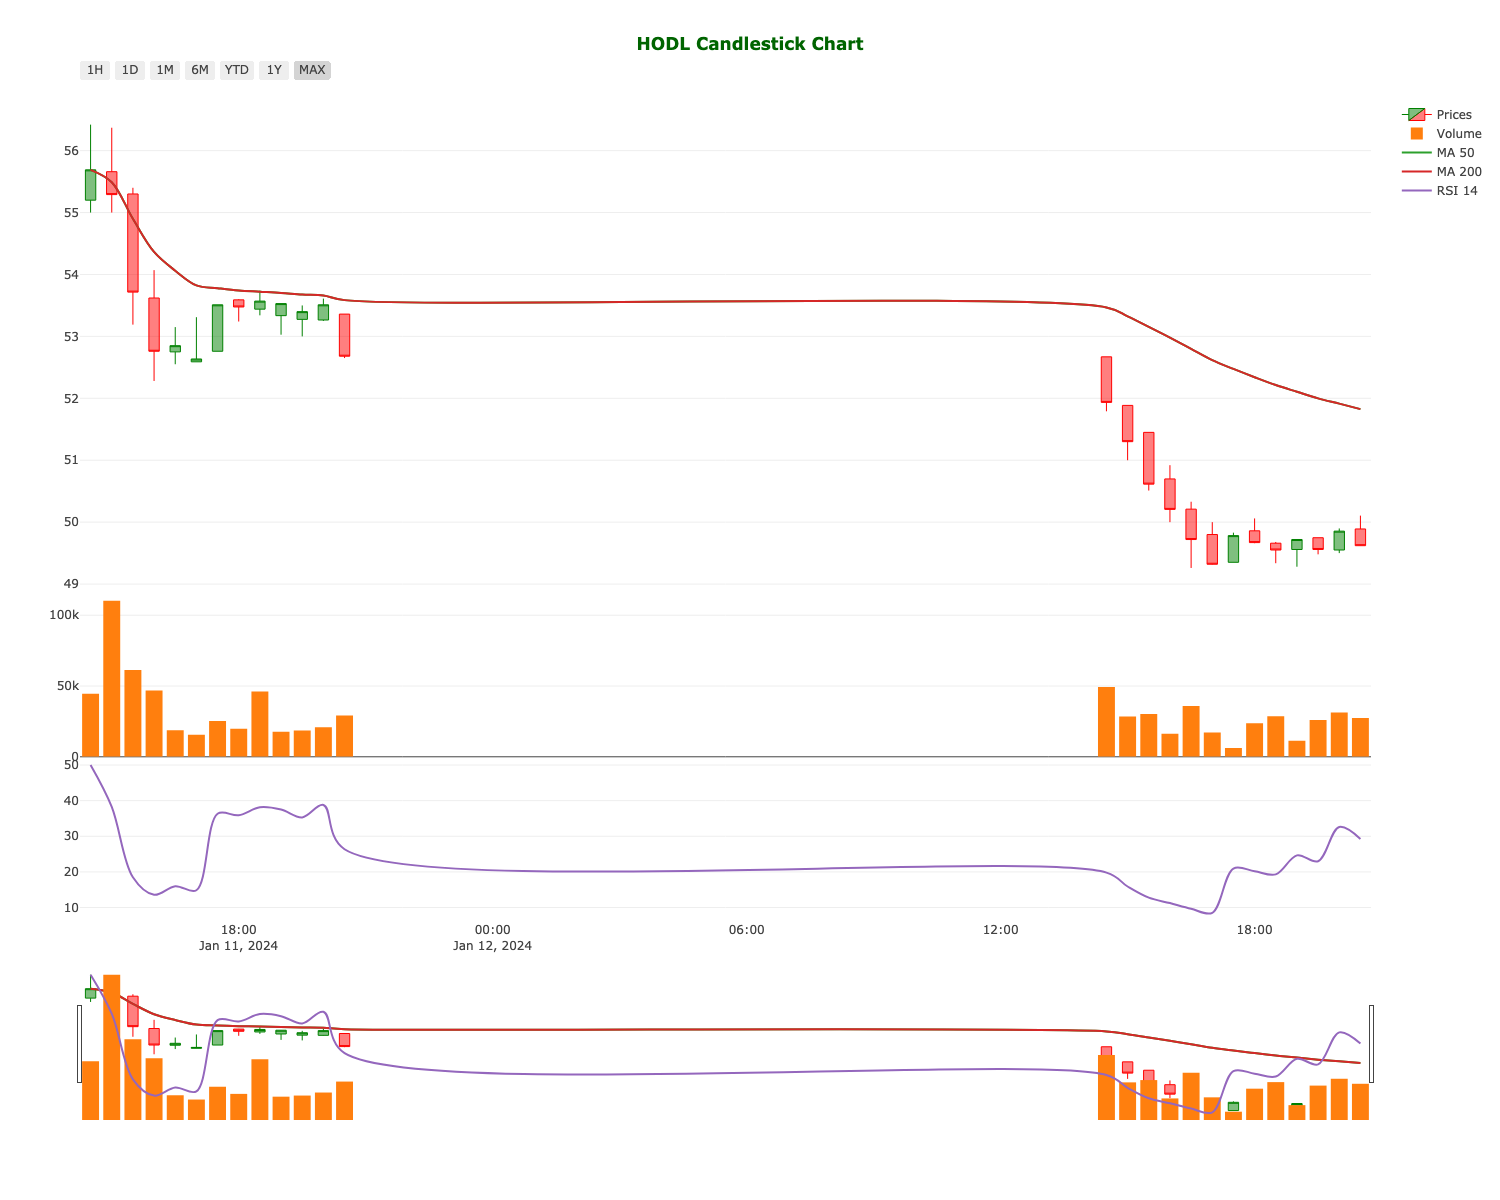

Chart Saved to candlestick_chart.png


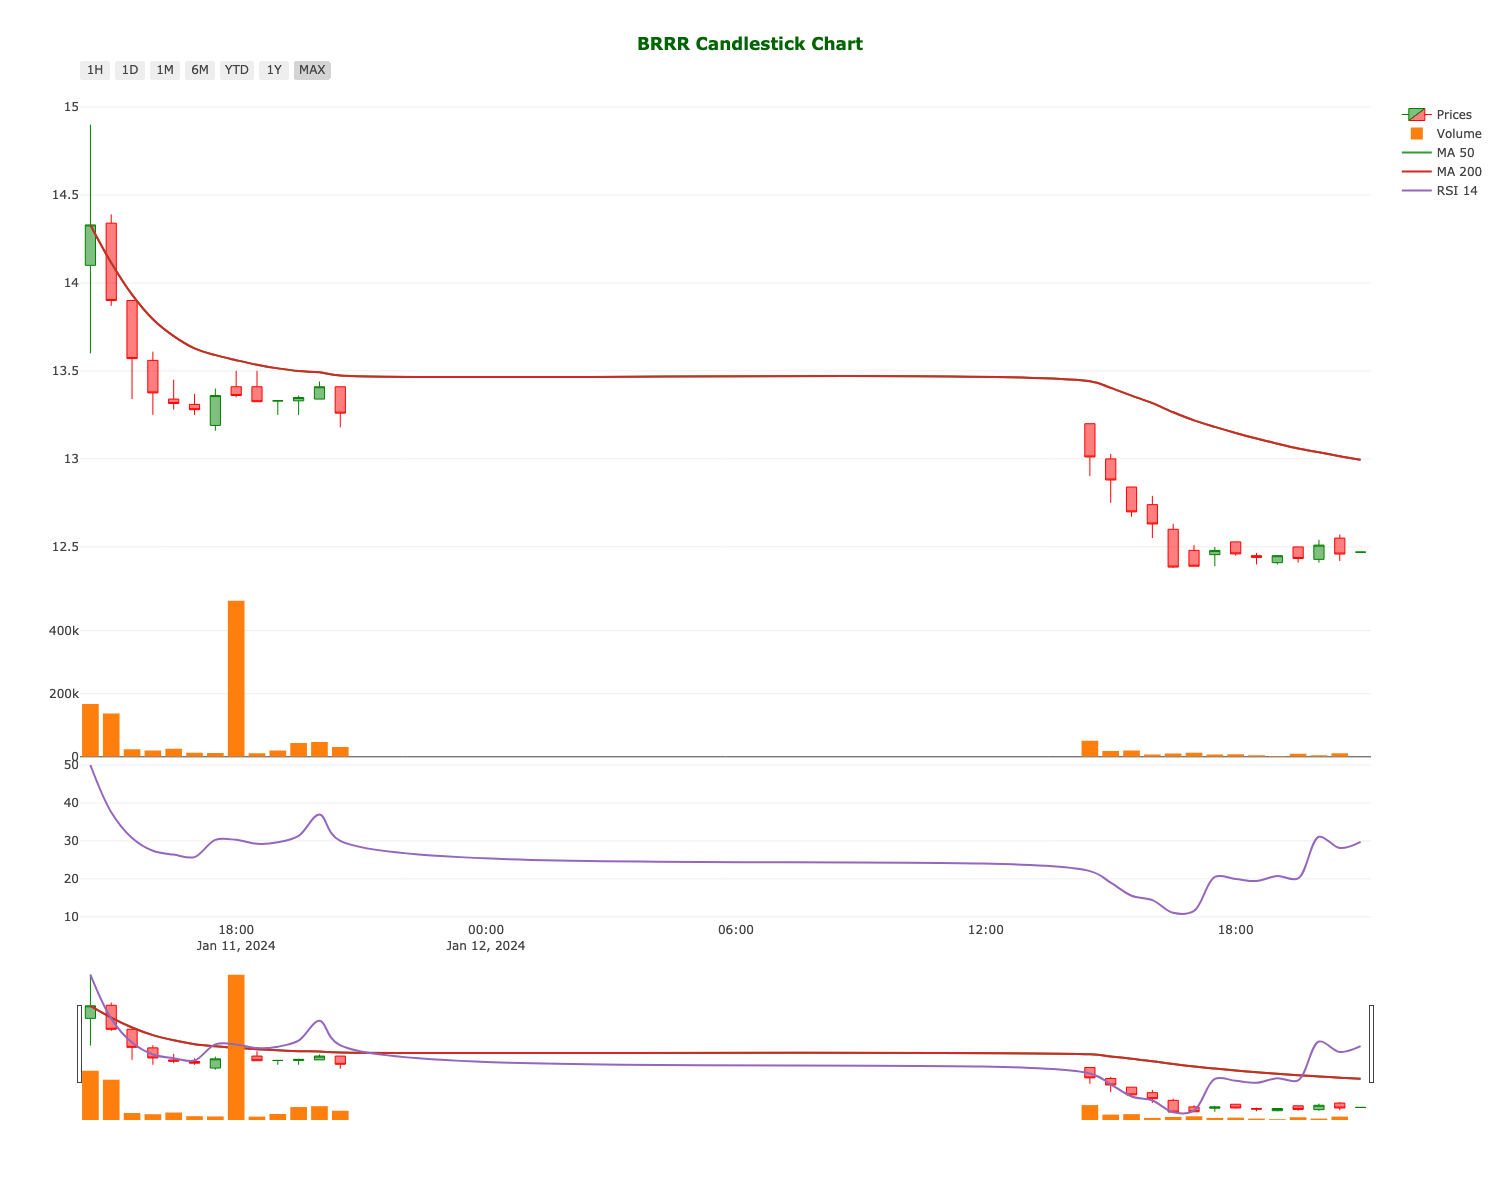

Chart Saved to candlestick_chart.png


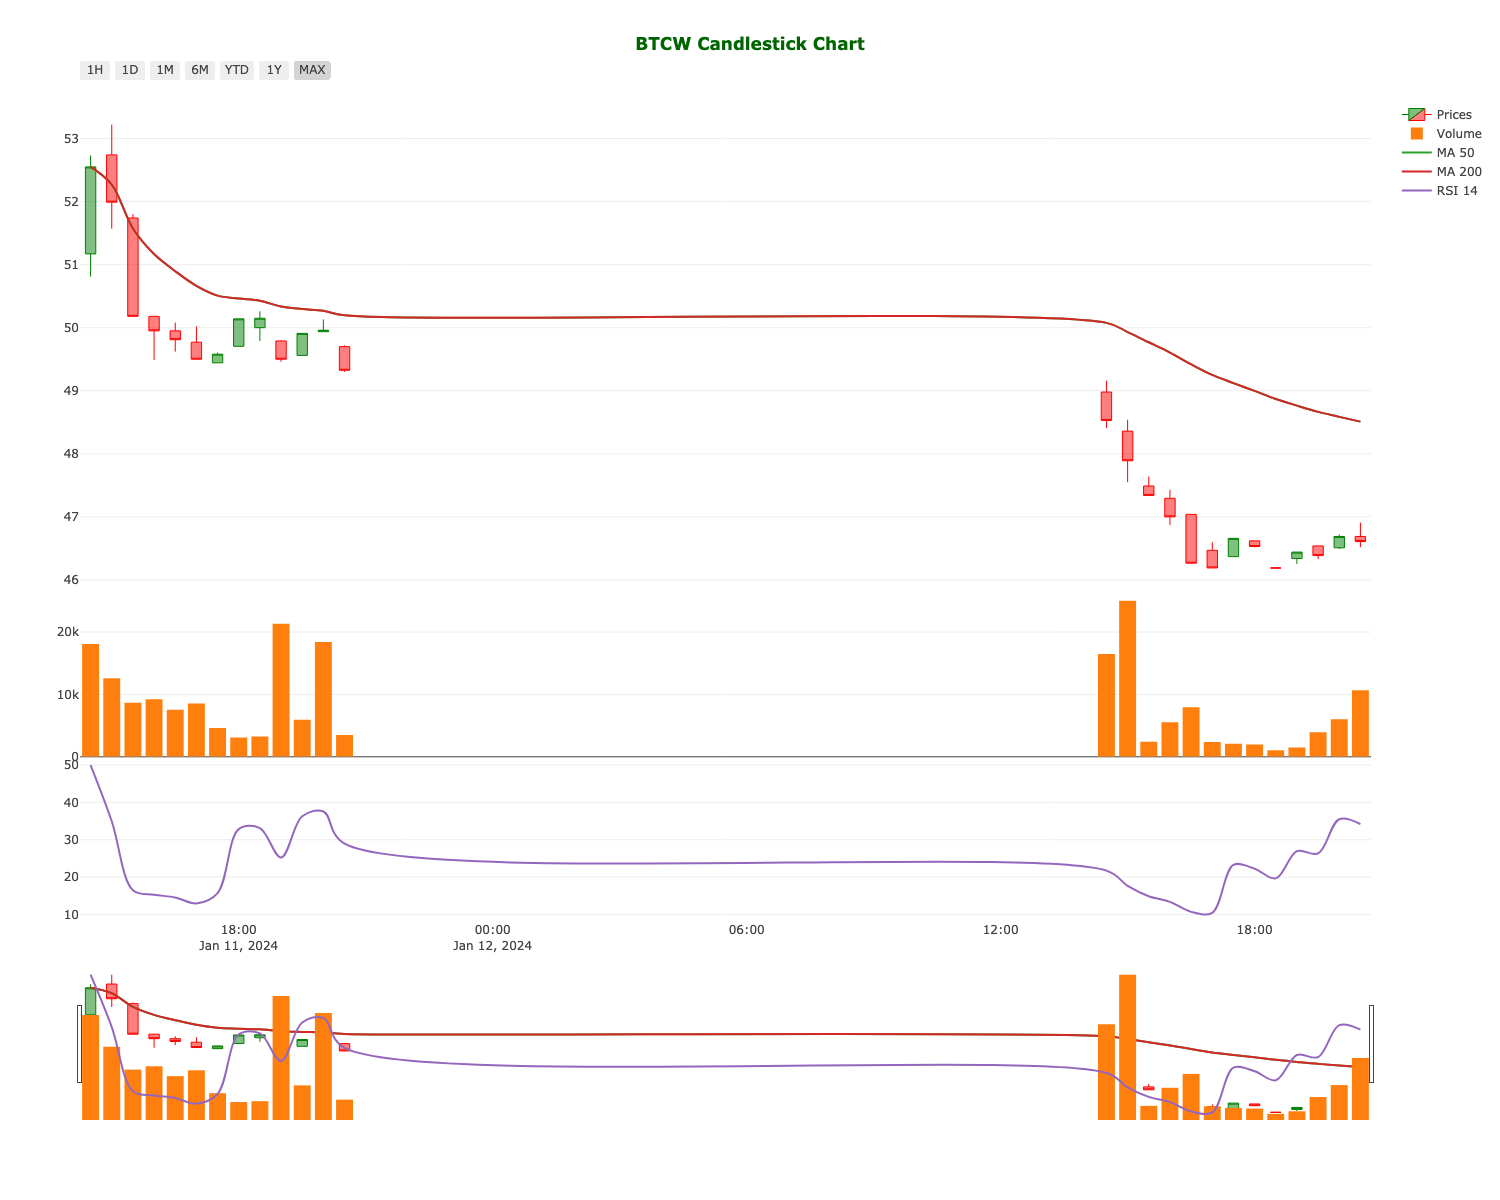

In [7]:
for ticker in tickers:
    ticker.display_candlestick_chart(start_date, end_date, interval, display_format)
    display(Image("candlestick_chart.png"))

### PERFORMANCE STATS

In [8]:
for ticker in tickers:
    print(ticker.compute_performance_stats(start_date, end_date, interval, benchmark_symbol, 
                                       confidence_level, risk_free_rate))
    print("\n\n")

{'Symbol': 'ARKB', 'Benchmark': 'BTC-USD', 'Start Date': '2024-01-10', 'End Date': '2024-01-15', 'Interval': '30m', 'Confidence Level': 0.95, 'Risk Free Rate': 0.04, 'Daily Return': -0.007147764720765818, 'Daily Volatility': 1.0674402884908998, 'Total Return': -13.644587181320523, 'Annualized Return': -1.7851746325922901, 'Annualized Volatility': 16.945089256547778, 'Alpha': 0.10663543398699937, 'Beta': 0.7811951886820179, 'Sharpe Ratio': -0.34140715017814566, 'Sortino Ratio': -0.389461969564959, 'Active Return': -43.16077518085646, 'Active Risk': 7.9377357690853065, 'Information Ratio': -5.437416466916488, 'Calmar Ratio': -0.5065035100543869, 'Maximum Drawdown': 3.524505945478252, 'Value at Risk': -3.1630613365951845, 'Expected Shortfall': -3.524505945478252, 'Security Prices': shape: (27,)
Series: '' [f64]
[
	50.7901
	49.0
	47.4501
	46.813
	46.799999
	46.59
	47.07
	47.129902
	47.049999
	46.73
	47.095001
	47.250801
	…
	45.349899
	44.839001
	44.403801
	43.790001
	43.697899
	44.040001
	

### PERFORMANCE CHARTS

Chart Saved to ticker_performance_chart.png


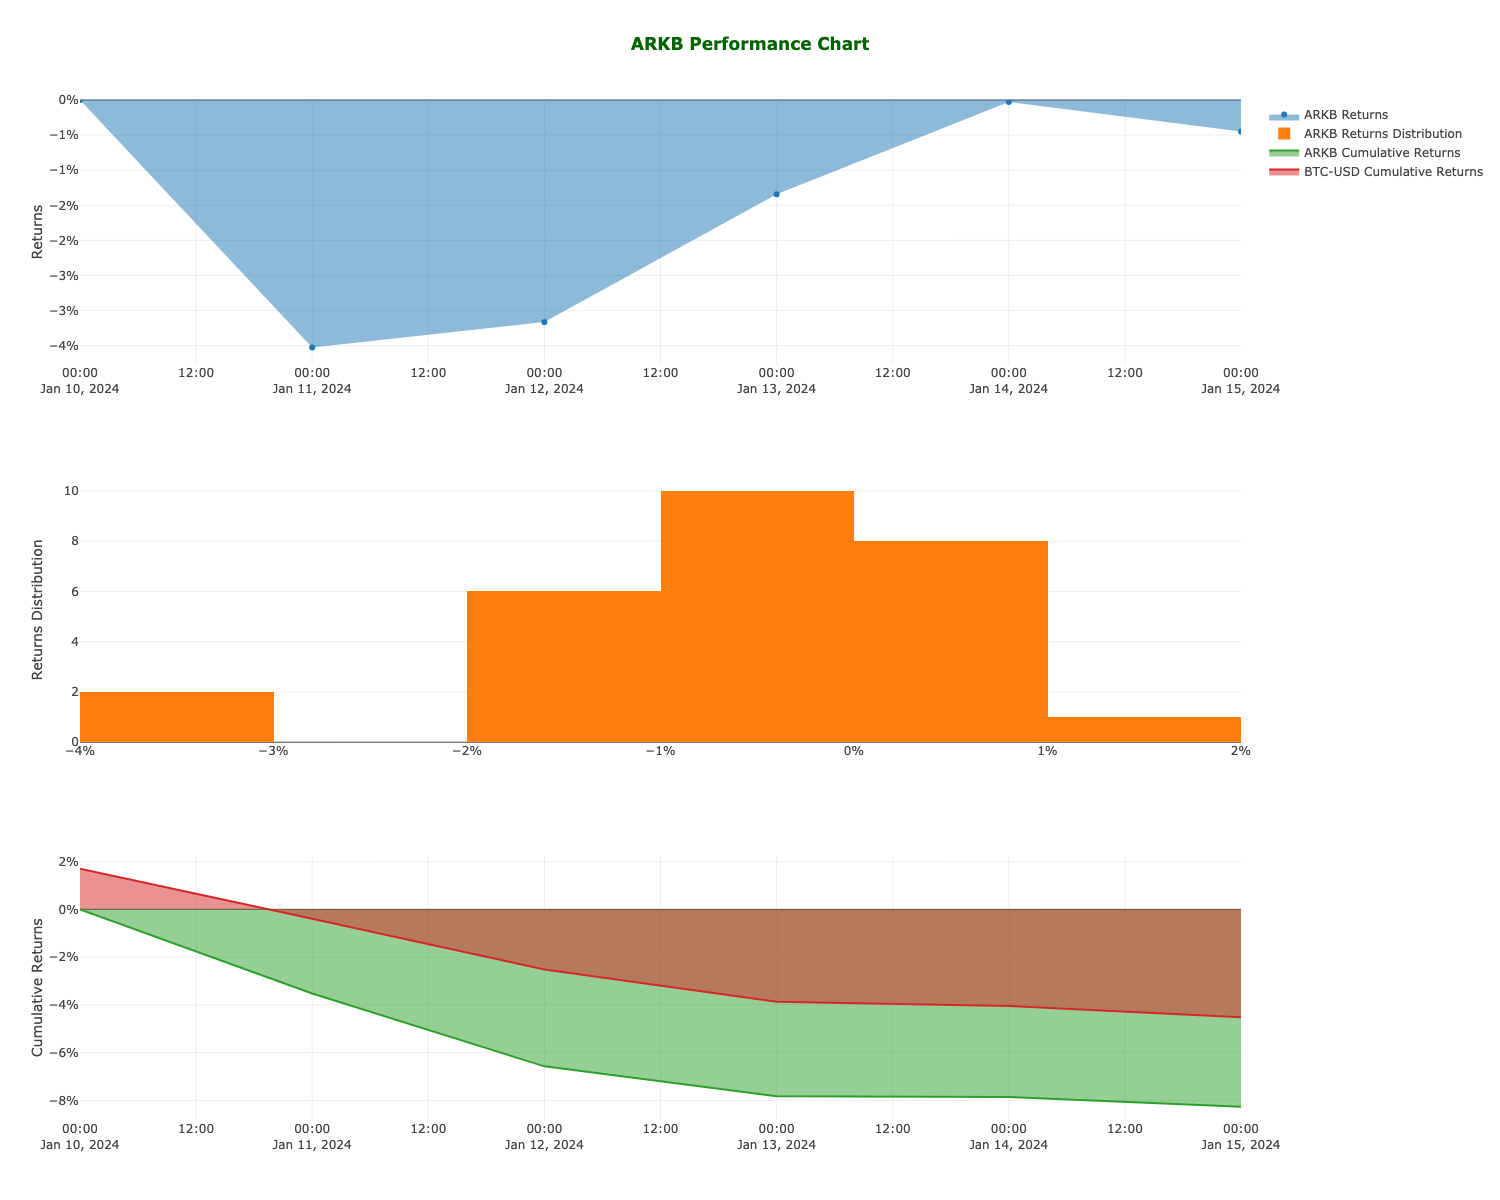

Chart Saved to ticker_performance_chart.png


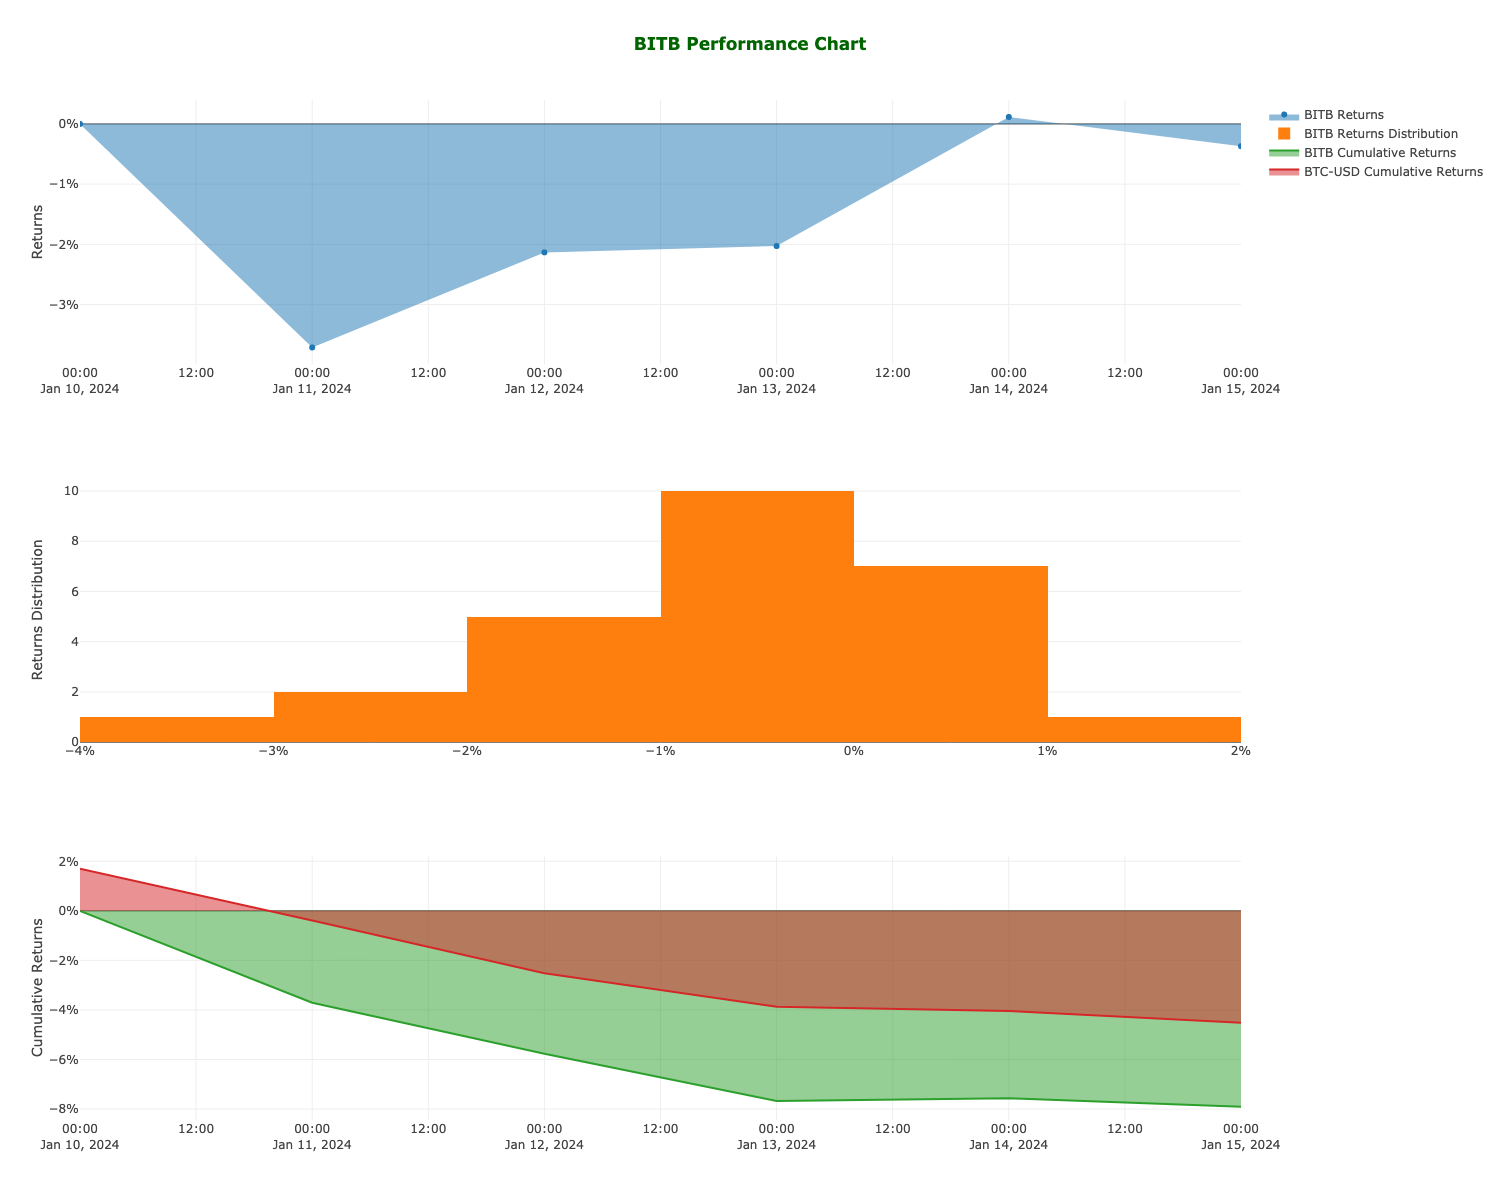

Chart Saved to ticker_performance_chart.png


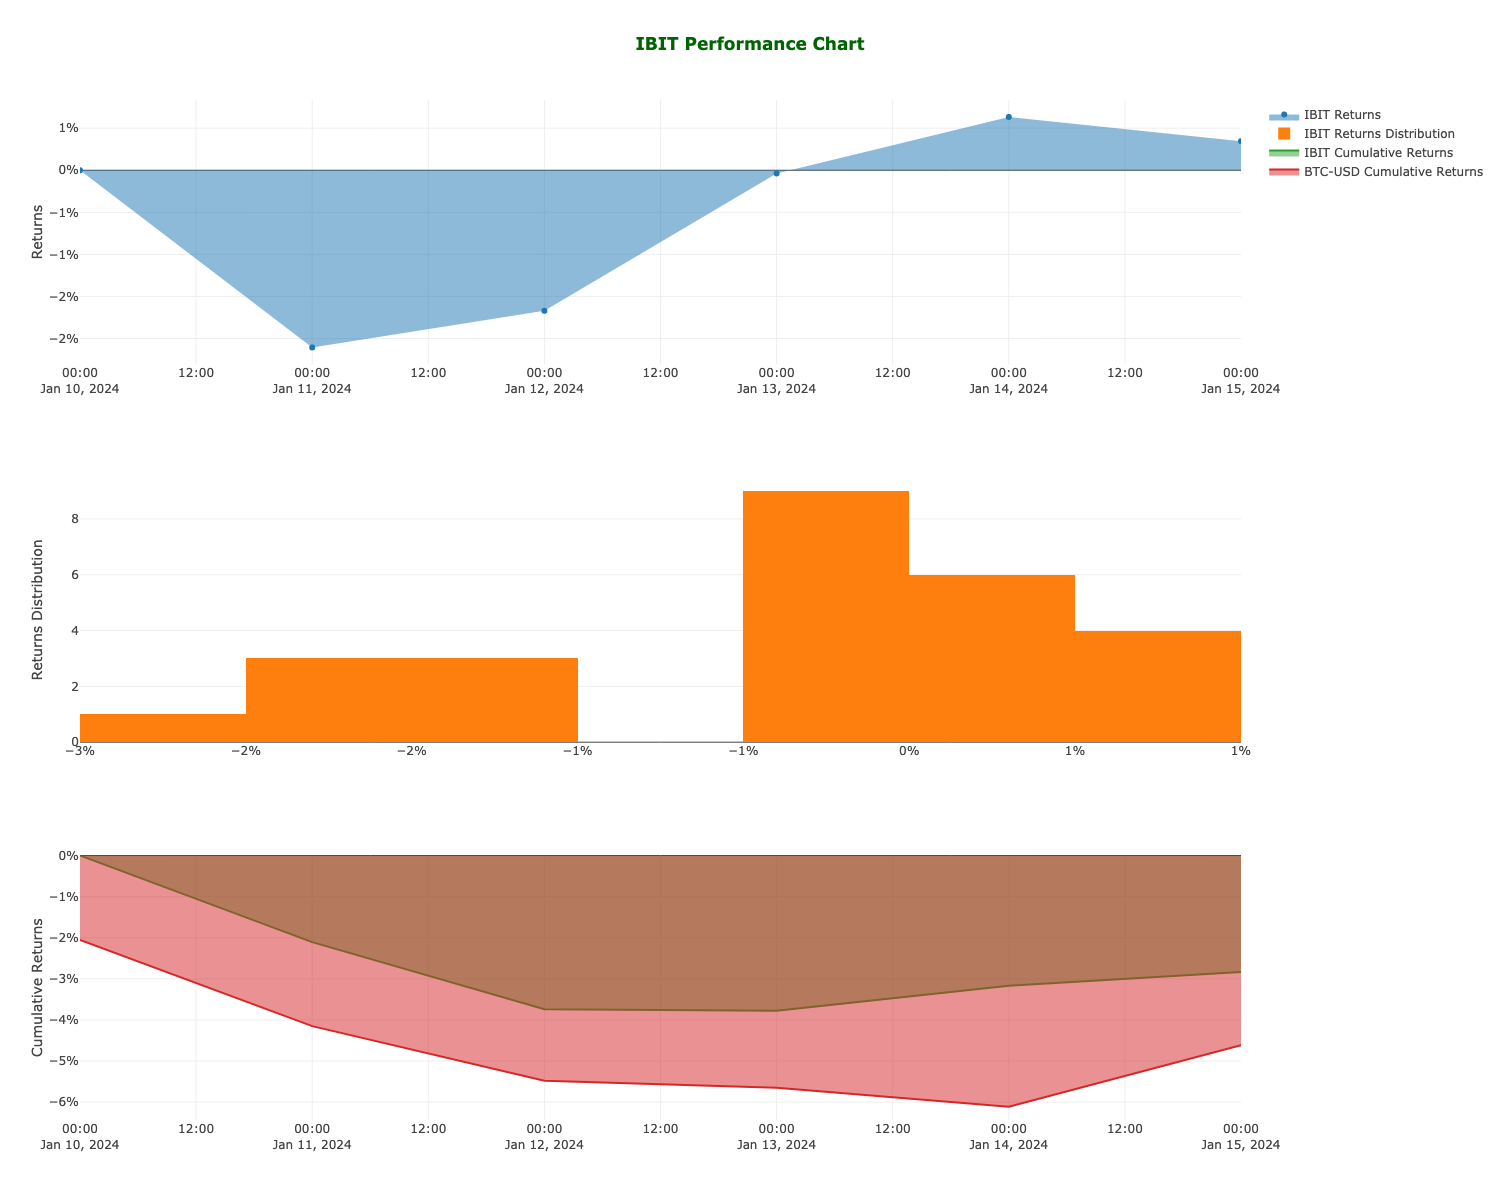

Chart Saved to ticker_performance_chart.png


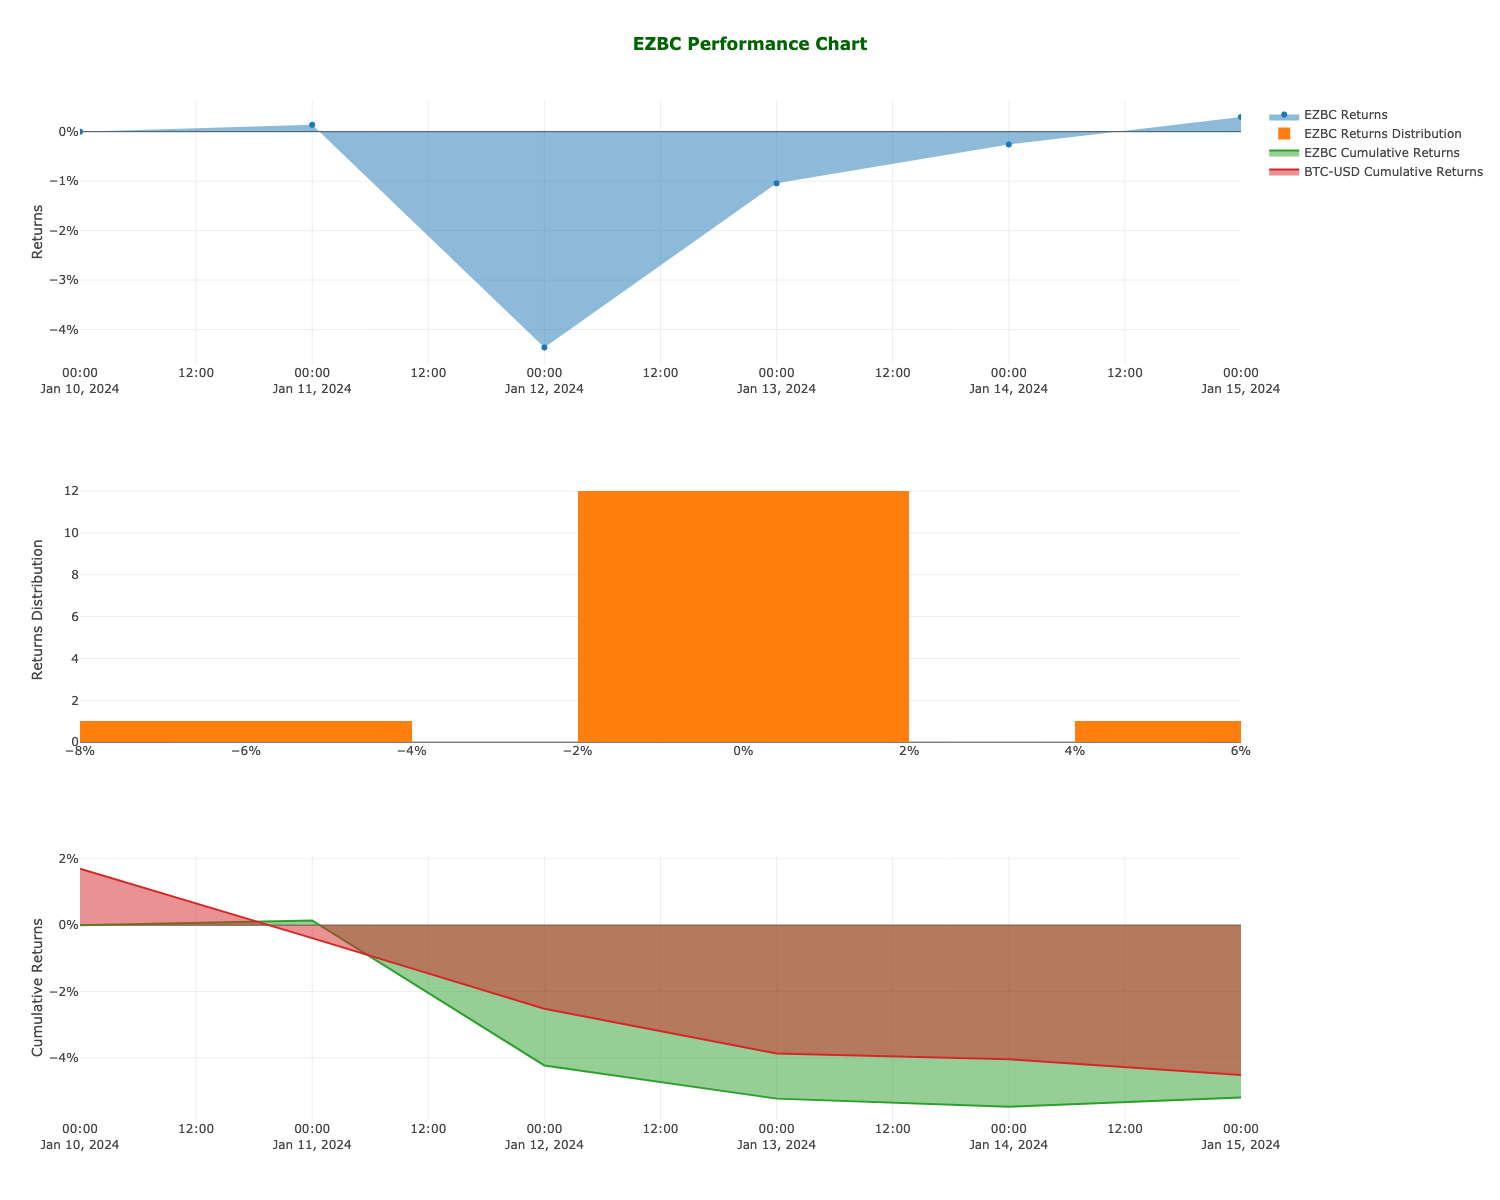

Chart Saved to ticker_performance_chart.png


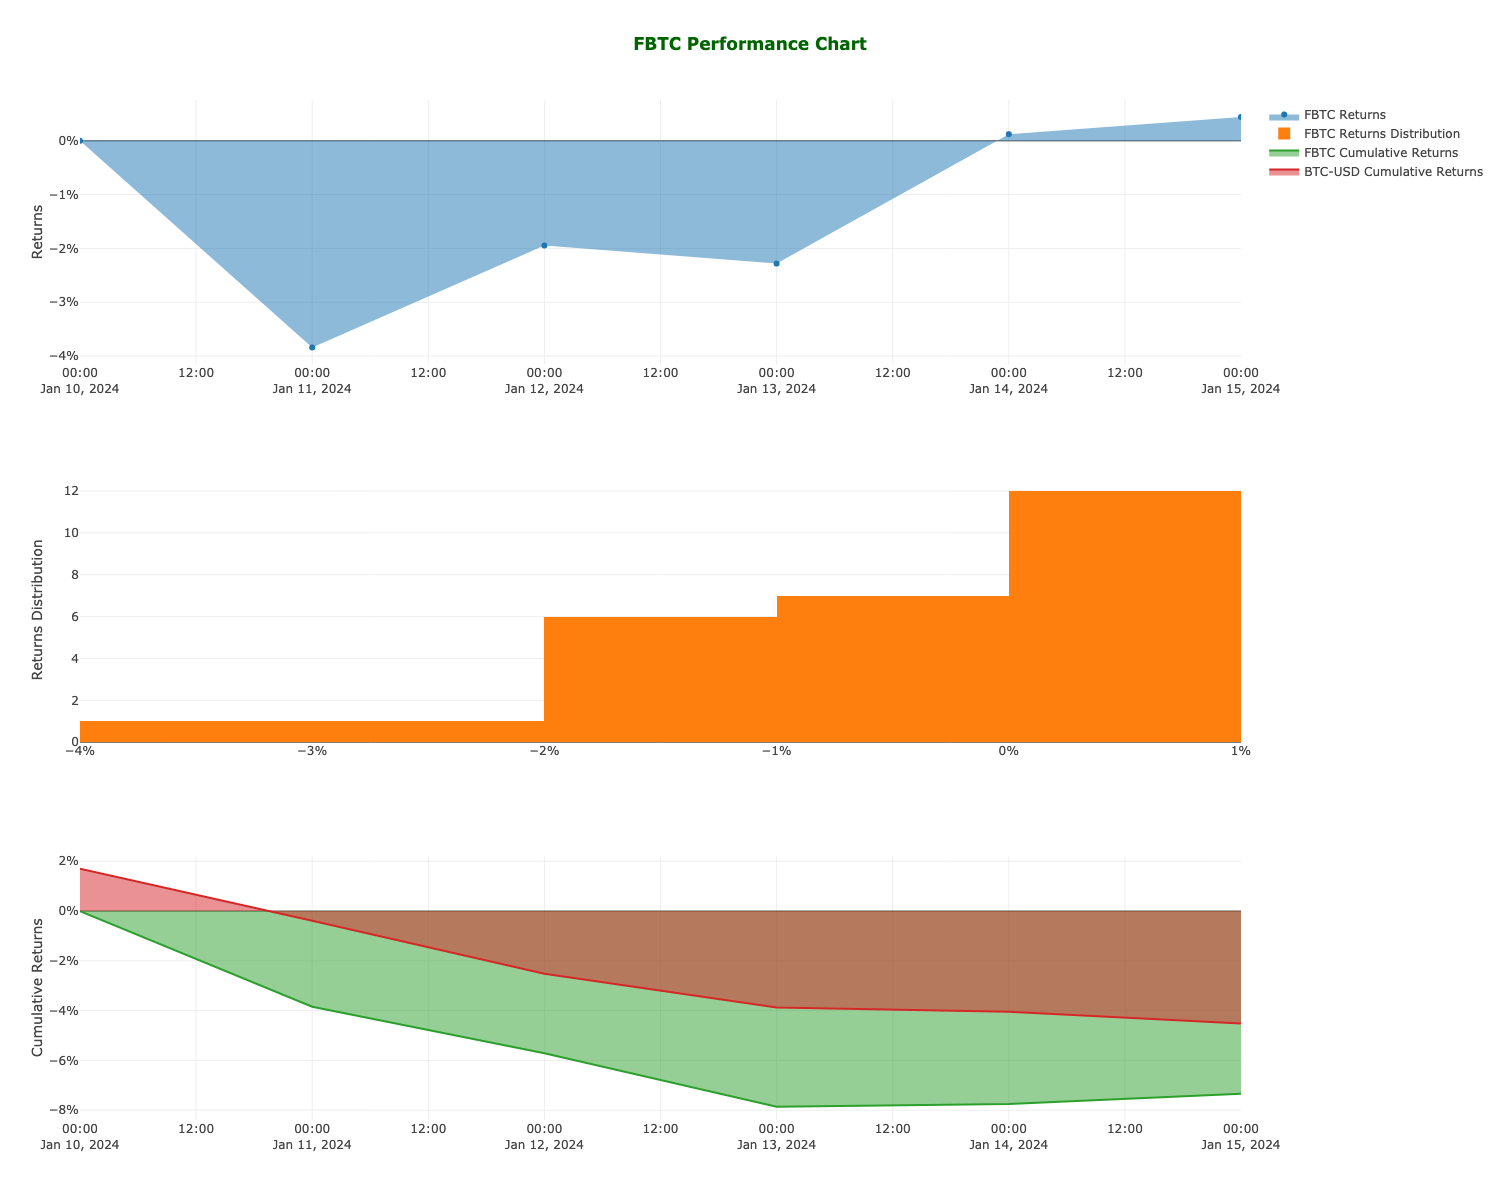

Chart Saved to ticker_performance_chart.png


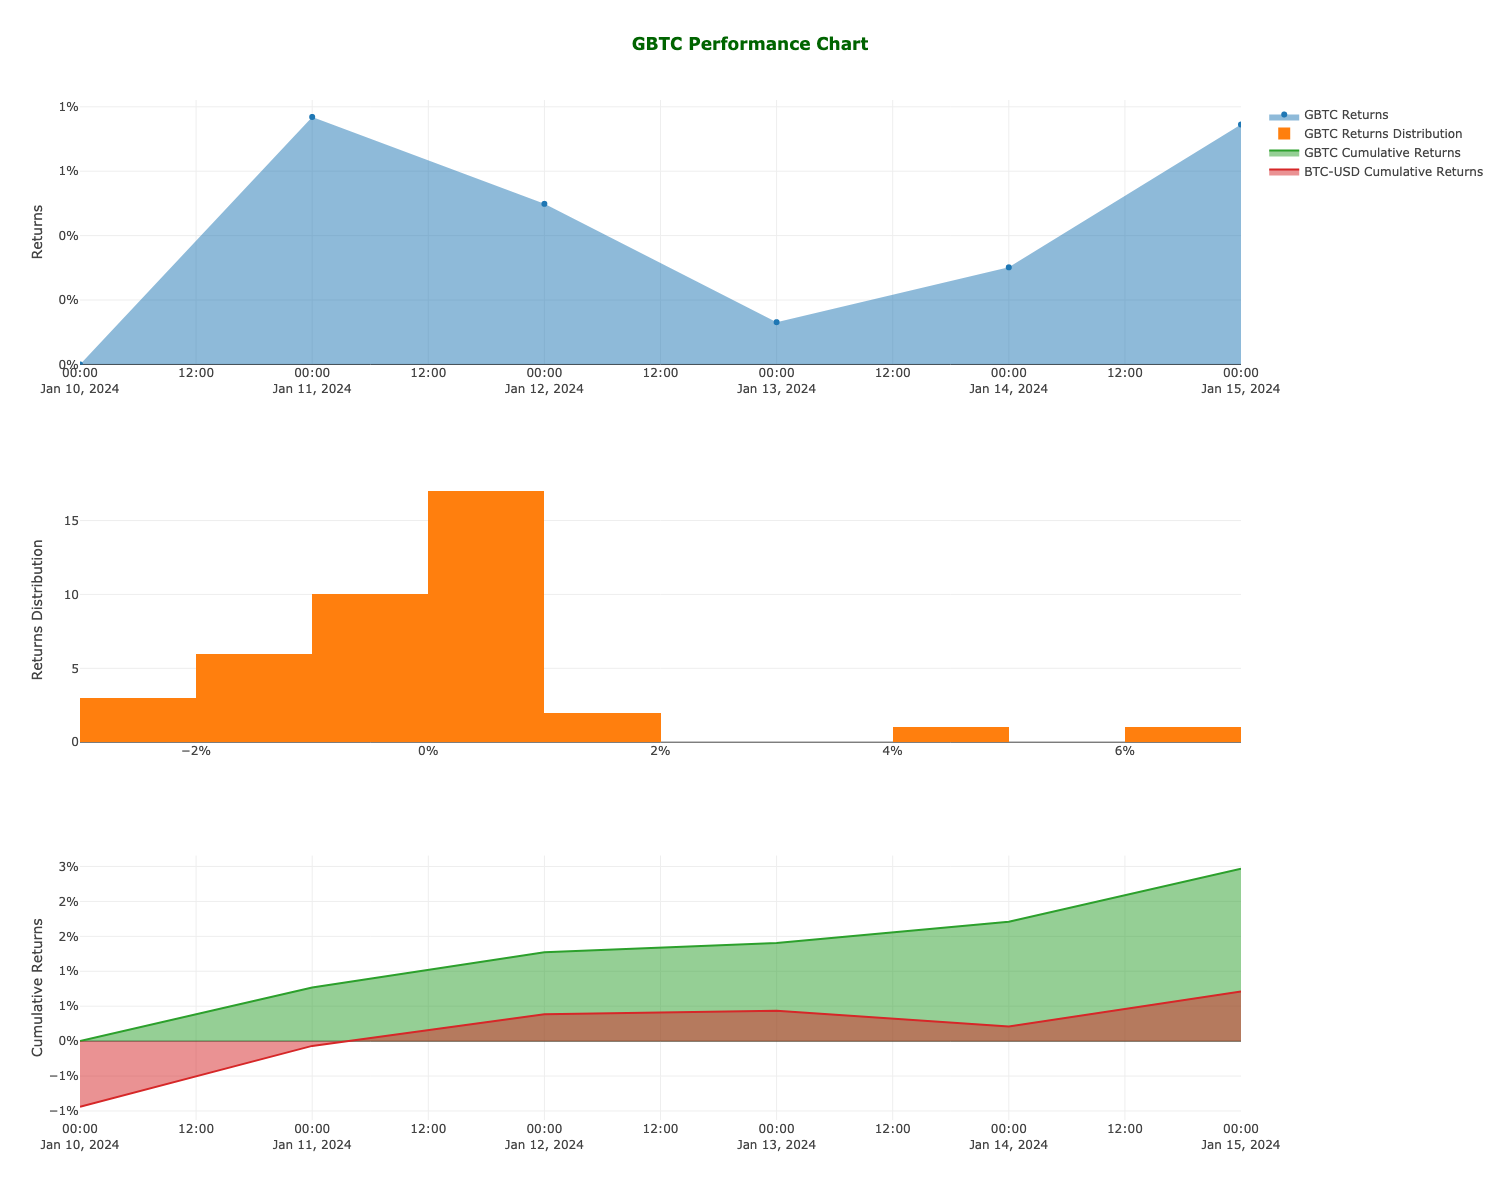

Chart Saved to ticker_performance_chart.png


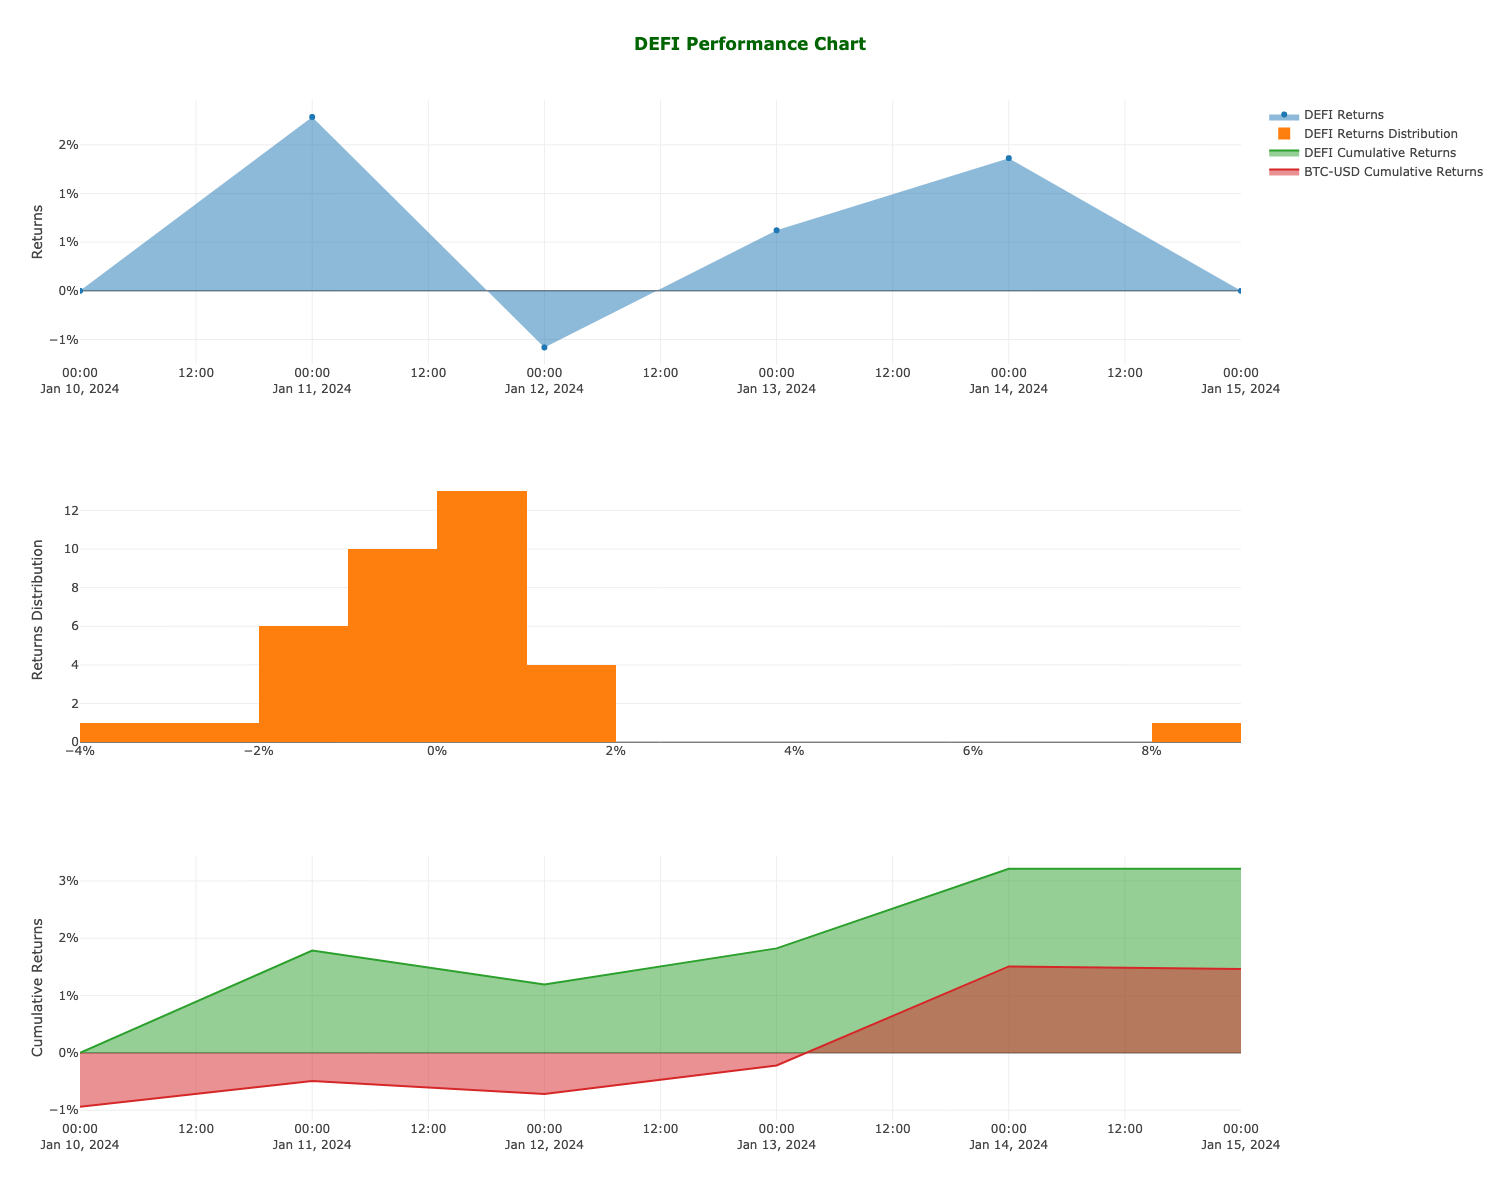

Chart Saved to ticker_performance_chart.png


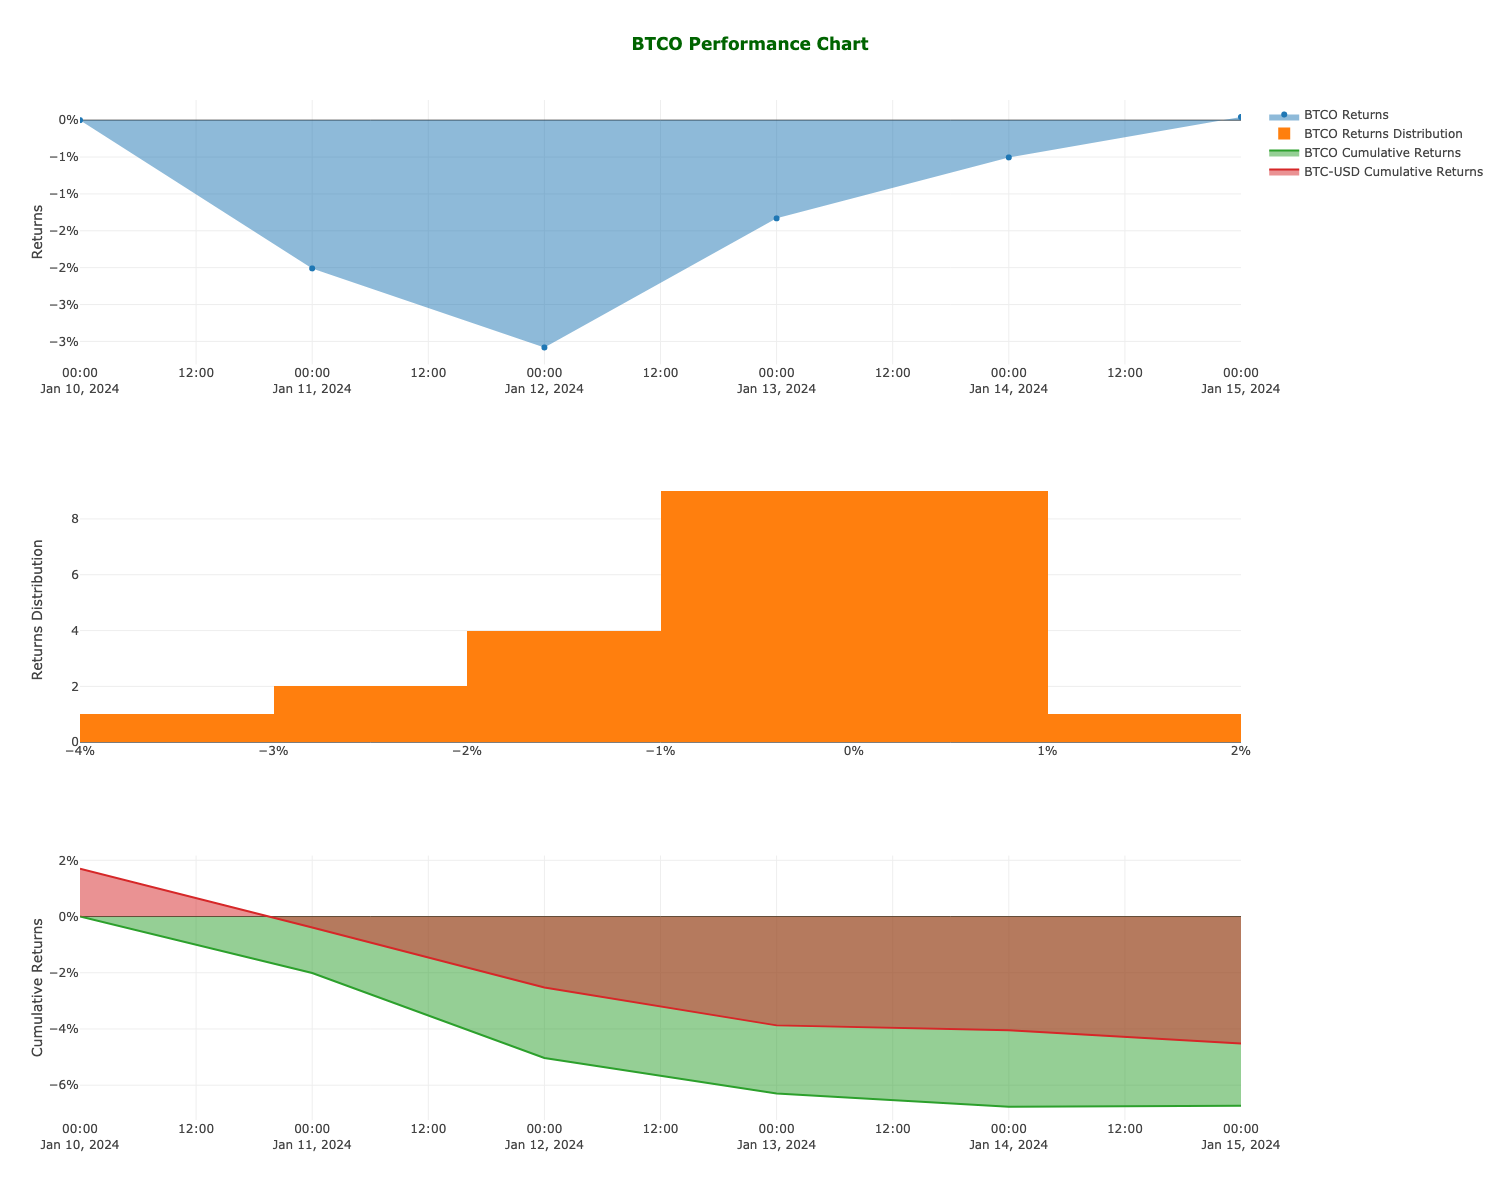

Chart Saved to ticker_performance_chart.png


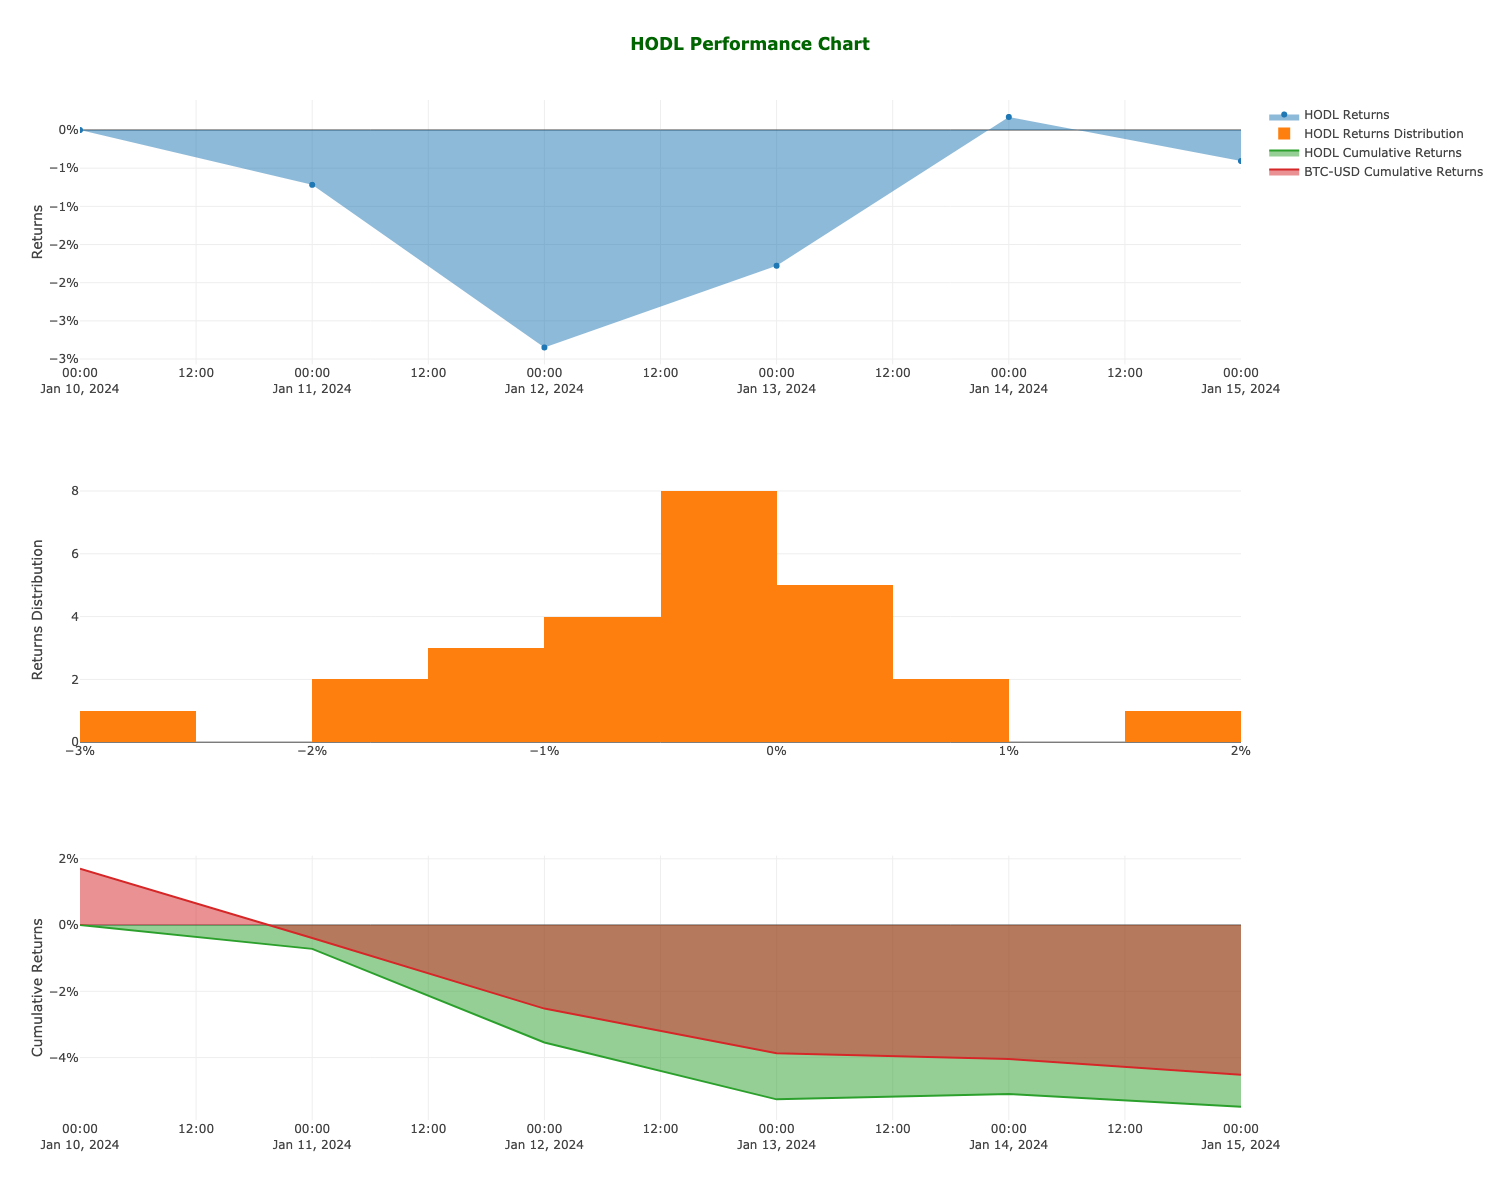

Chart Saved to ticker_performance_chart.png


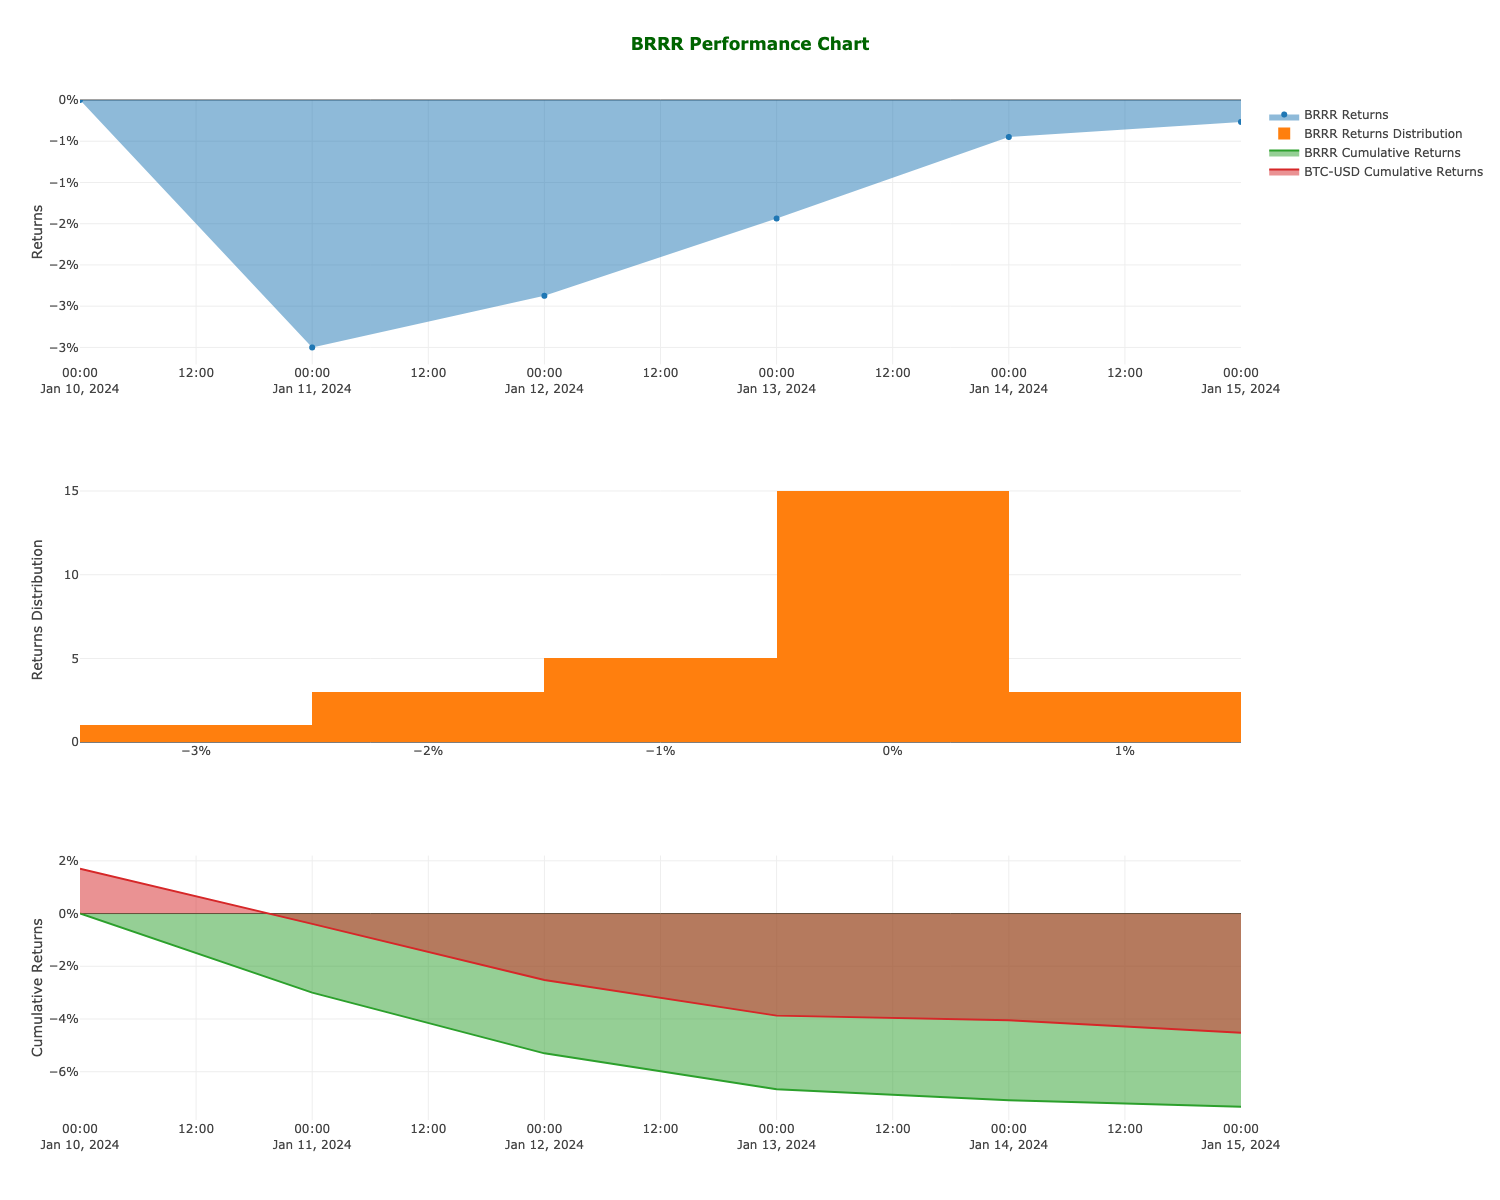

Chart Saved to ticker_performance_chart.png


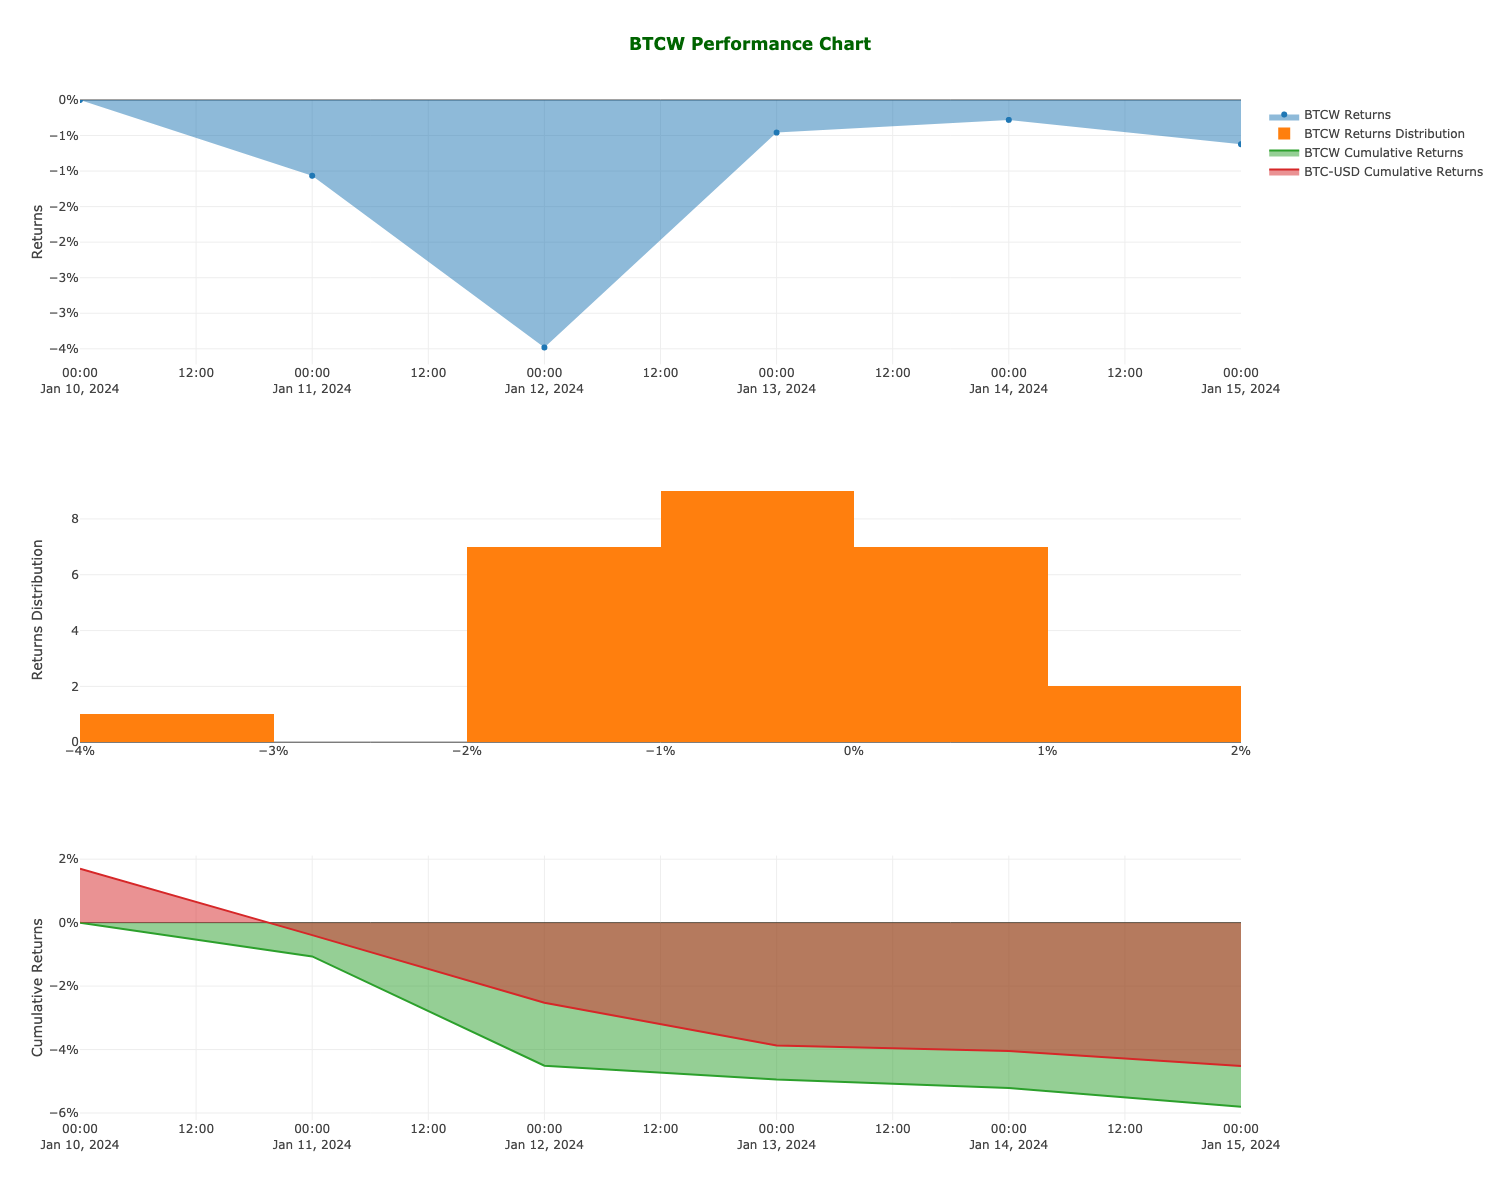

In [9]:
for ticker in tickers:
    ticker.display_performance_chart(start_date, end_date, interval, benchmark_symbol, 
                                       confidence_level, risk_free_rate, display_format)
    display(Image("ticker_performance_chart.png"))

### LATEST NEWS

In [10]:
news_start_date = (datetime.strptime(end_date, "%Y-%m-%d") - timedelta(1)).strftime("%Y-%m-%d")
for ticker in tickers:
    ticker_news = ticker.get_news(news_start_date, end_date, compute_sentiment=False)
    for v in ticker_news.values():
        print(v)
        print("\n\n")

{'Title': 'Unveiling Bitcoin Reserves — A Deep Dive Into Holdings of 6 New ... - Bitcoin.com News', 'Source': 'Bitcoin.com News', 'Link': 'https://news.google.com/rss/articles/CBMiaWh0dHBzOi8vbmV3cy5iaXRjb2luLmNvbS91bnZlaWxpbmctYml0Y29pbi1yZXNlcnZlcy1hLWRlZXAtZGl2ZS1pbnRvLWhvbGRpbmdzLW9mLTYtbmV3LXNwb3QtYml0Y29pbi1ldGZzL9IBAA?oc=5', 'Timestamp': 'Sun, 14 Jan 2024 23:54:10 GMT', 'Text': ' ', 'Sentiment Score': 0.0, 'Positive Score': 0.0, 'Negative Score': 0.0, 'Positive Keywords': [], 'Negative Keywords': []}



{'Title': 'SEC Approves Bitcoin ETFs: A Turning Point for Cryptocurrency ... - BNN Breaking', 'Source': 'BNN Breaking', 'Link': 'https://news.google.com/rss/articles/CBMibGh0dHBzOi8vYm5uYnJlYWtpbmcuY29tL2Jubi1uZXdzcm9vbS9zZWMtYXBwcm92ZXMtYml0Y29pbi1ldGZzLWEtdHVybmluZy1wb2ludC1mb3ItY3J5cHRvY3VycmVuY3ktaW52ZXN0aW5nL9IBAA?oc=5', 'Timestamp': 'Sun, 14 Jan 2024 15:20:00 GMT', 'Text': ' ', 'Sentiment Score': 0.0, 'Positive Score': 0.0, 'Negative Score': 0.0, 'Positive Keywords': [], 'N

### COMBINED RETURNS CHARTS

chart written to asset_returns.png


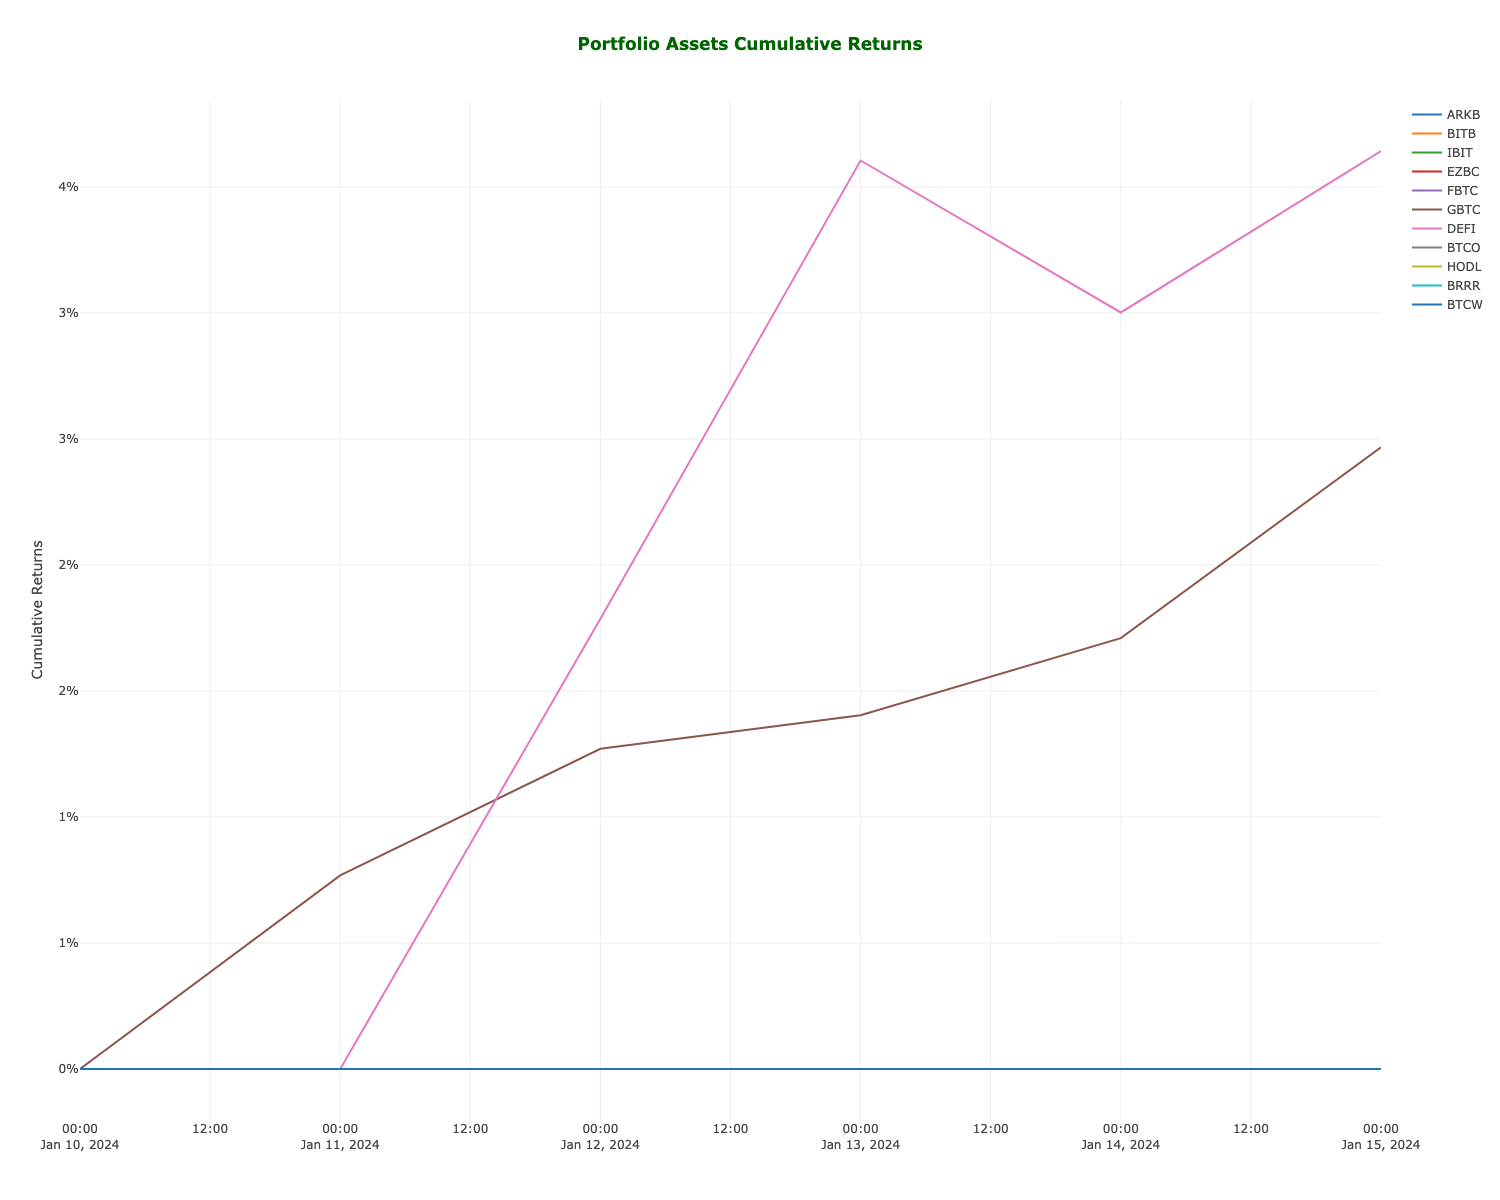

In [11]:
ticker_symbols = [ticker.symbol for ticker in tickers]
portfolio = Portfolio(ticker_symbols, benchmark_symbol, start_date, end_date, interval, 
                      confidence_level, risk_free_rate, max_iterations=1000, objective_function="max_sharpe")
portfolio.display_portfolio_charts("asset_returns", "png")
display(Image("asset_returns.png"))